
# Guide to Extracting Data w/ APIs from Polar Vantage V2

<img src='https://i.imgur.com/xqJvlna.jpeg' height="500"> 

A picture of the Polar Mobile Application

Where do polar bears go to vote? <br>The North Pole.

In this notebook, we would definitely not be visiting the North Pole to watch Polar bears vote. Instead, we will be using the [Polar Vantage V2](https://www.polar.com/en/vantage/v2) which is a smart watch designed for carefully monitoring the most important muscle in your body -- your body. The watch is equipped with advanced wrist-based HR tracking, GPS, ultra-long battery life, running & cycling performance tests, FuelWise, route guidance, sleep tracking, & more. The Vantage V2 can also be utlized to record more than 130 popular sports. It also has an app that you can utilize to view reports on your data.

This is a comprehensive, clear guide to extract your data from the Polar Flow App using the [official](https://github.com/polarofficial/accesslink-example-python) Polar Accesslink Application Programming Interface (API).

We will be able to extract the following parameters:

Parameter Name  | Sampling Frequency 
-------------------|-----------------
Heart Rate |  Every 5 minutes
Heart Rate Variability |  Every 5 minutes
Breathing Rate |  Every 5 minutes
Hypnogram |  For every change detected in sleeping phase 
Calories |  Per Activity
Average and Maximum Heart Rate |  Per Activity
Light Sleep Duration | Per Night
Deep Sleep Duration | Per Night
Interruption Duration | Per Night
REM Duration | Per Night
Sleep Score | Per Night
Sleep Duration | Per Night
Sleep Cycles Count | Per Night
Sleep Regeneration Score | Per Night
Beat to Beat Average | Per Night
Heart Rate Variability Average | Per Night
Breathing Rate Average | Per Night
Heart Rate Average | Per Night

In this guide, we sequentially cover the following **five** topics to extract data from the Polar Acesslink API:

1. **Set up**<br>
   - 1.1 Setup and usage guidelines for the participant. <br>
   - 1.2 Library imports <br>
2. **Authentication/Authorization**<br>
   - 2.1 Usage and Authentication guidelines for the researcher.<br>
3. **Data extraction**<br>
  - 3.1 Extracting Data from the Polar Acesslink API<br>
  - 3.2 Storing Data from the Polar Accesslink API<br>
4. **Data visualization & analysis** <br>
  - 4.1 Visualizing Participants Heart Rate during Sleep! <br>
  - 4.2 Visualizing Participants Sleep Breakdown! <br>
  - 4.3 Visualizing Weekly Sleep Summary! <br>
5. **Data Analysis** <br>
  - 5.1 Analyzing correlation between Sleep Phase and Heart Rate! <br>
  - 5.2 Analyzing correlation between Heart Rate variability and Breathing Rate!

**Note that we are not making any scientific claims here as our sample size is small and the data collection process was not rigorously vetted (it is our own data), only demonstrating that this code could potentially be used to perform rigorous analyses in the future.**

#1. Set up

##1.1 Setup and usage, participant

Note: These steps are to be followed by the participants from their account to grant the researcher with the client secret and client id.

Step 1: Make sure that your Polar Vantage is connected with your polar flow account. Then go to: <br>
https://admin.polaraccesslink.com/

Step 2: If you are not already logged in, you will be taken into a login page where the user has to put in their email and password. <br>
<img src="https://i.imgur.com/sXHU7Qw.png" width='750px'> 

Step 3: After you're logged in, click on create a new client if you don't have one already set up.

<img src="https://i.imgur.com/bVxSuMh.png" width="750px">

Step 4: Enter some basic information about your organization.
<img src="https://i.imgur.com/9TtwkLx.png" width="750px">

Step 5: Enter your application information. Make sure to check all 3 data types as we will be using them in our Notebook.
Note: Make sure to set the Authourization collback domain:<br>
http://localhost:5000/oauth2_callback
<img src='https://i.imgur.com/Nq1qkTp.png' width='750px'>

Step 6: Copy the Client id and Client secret. We would require this in sections 2 and 3.
<img src="https://i.imgur.com/mfZpqYO.png" width='750px'>

## 1.2 Library Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, patches
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from scipy import stats

# 2. Authentication/Authorization
To obtain access to data, authorization is required.

##2.1 Setup and usage, researcher

In [ ]:
#@title Enter paricipant's Client ID, Client Secret and Refresh Token

client_id = '99ee57ea-661d-45cb-9d44-e349a9d9aff7' #@param {type:"string"}
client_secret = '50dd0d90-a407-4c08-b2a1-b4fabc8b91fc' #@param {type:"string"}
email = 'arjo@stanford.edu' #@param {type:"string"}
password = 'StanfordHealth123'#@param {type:"string"}

print('Client ID: '+client_id)
print('Client Secret: '+client_secret)
print('Email: '+email)
print('Password: '+password)

Client ID: 99ee57ea-661d-45cb-9d44-e349a9d9aff7
Client Secret: 50dd0d90-a407-4c08-b2a1-b4fabc8b91fc
Email: arjo@stanford.edu
Password: StanfordHealth123


# 3. Data Extraction

We will be extracting our data from the Polar Flow API. For this we will be using the official Polar Accesslink API: https://www.polar.com/accesslink-api/ 

## 3.1 Accessing Participants Data

AccessLink has an official python [example code](https://github.com/polarofficial/accesslink-example-python) which makes it super easy to access the data that we require. In order to do this, follow the next few steps:<br>
1. Make sure you have python downloaded and installed on your computer.
2. Go to https://github.com/polarofficial/accesslink-example-python and download/clone the code on your local machine. 
<img src="https://i.imgur.com/5jCWMAd.png" width='750px'>
3. Open the repositiory in any code editor that can execute python code.
<img src="https://i.imgur.com/yWNALiN.png" width='750px'>
4. Paste the client secret and client id in the config.yml file.
<img src="https://i.imgur.com/emejuRv.png" width='750px'>
5. Make sure all the library requirements are installed for the python code to run, you can do this by running <br>`pip3 install -r requirements.txt` in the terminal. <img src='https://i.imgur.com/iUWaTrO.png' width='750px'>
6. Next, execute exampleapp.py in the python terminal. You can do this by simply typing `python exampleapp.py` in the terminal.
<img src='https://i.imgur.com/Sr99A8V.png' width='750px'>
7. Go to http://localhost:5000/ and click on Link to authorize
<img src='https://i.imgur.com/4BdkaU0.png' width='750px'>
8. Next, it should automatically link your account, if it does not you might have to login into the participants account using their credentials. After this you need to click on read data.
<img src='https://i.imgur.com/HkZ4XvB.png' width='750px'>
9. If everything worked well, you should now have access to the participants data that we can simply copy and paste into our variables below for data analysis and visualizations.
<img src='https://i.imgur.com/VonusVN.png' width='750px'>

## 3.2 Storing Participants Data

Next, we will copy and paste all the data from the example app into variables for us to use. For empty options, do not change the variables.

Step 1: Copy and paste all the data from 'Exercise Information' into the variable below.

In [ ]:
exercise_data = [{'id': 'y1M6j8lN', 'upload_time': '2022-08-27T06:55:15Z', 'polar_user': 'https://www.polaraccesslink.com/v3/users/58933992', 'device': 'Polar Vantage V2', 'device_id': 'AD29292F', 'start_time': '2022-08-25T15:50:24', 'start_time_utc_offset': -420, 'duration': 'PT3932.970S', 'heart_rate': {'average': 100, 'maximum': 155}, 'sport': 'OTHER', 'has_route': False, 'detailed_sport_info': 'STRENGTH_TRAINING', 'calories': 290}]
exercise_data

[{'id': 'y1M6j8lN',
  'upload_time': '2022-08-27T06:55:15Z',
  'polar_user': 'https://www.polaraccesslink.com/v3/users/58933992',
  'device': 'Polar Vantage V2',
  'device_id': 'AD29292F',
  'start_time': '2022-08-25T15:50:24',
  'start_time_utc_offset': -420,
  'duration': 'PT3932.970S',
  'heart_rate': {'average': 100, 'maximum': 155},
  'sport': 'OTHER',
  'has_route': False,
  'detailed_sport_info': 'STRENGTH_TRAINING',
  'calories': 290}]

Step 2: Copy and paste all the data from 'User Information' into the variable below.

In [ ]:
user_info_data = {'polar-user-id': 58933992, 'member-id': '9fe30f6d162a49eeb4f8aed038ff982f', 'registration-date': '2022-08-21T16:36:47.000Z', 'first-name': 'Taylor', 'last-name': 'Swift', 'birthdate': '1989-12-13', 'gender': 'FEMALE', 'weight': 54.4311, 'height': 180.0, 'extra-info': []}
user_info_data

{'polar-user-id': 58933992,
 'member-id': '9fe30f6d162a49eeb4f8aed038ff982f',
 'registration-date': '2022-08-21T16:36:47.000Z',
 'first-name': 'Taylor',
 'last-name': 'Swift',
 'birthdate': '1989-12-13',
 'gender': 'FEMALE',
 'weight': 54.4311,
 'height': 180.0,
 'extra-info': []}

Step 3: Copy and paste all the data from 'Sleep Information' into the variable below.

In [ ]:
sleep_data = {'nights': [{'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-26', 'sleep_start_time': '2022-08-25T23:55:01.334-07:00', 'sleep_end_time': '2022-08-26T08:43:31.334-07:00', 'device_id': 'AD29292F', 'continuity': 1.7, 'continuity_class': 1, 'light_sleep': 16350, 'deep_sleep': 6780, 'rem_sleep': 5910, 'unrecognized_sleep_stage': 0, 'sleep_score': 73, 'total_interruption_duration': 2670, 'sleep_charge': 3, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1620, 'long_interruption_duration': 1050, 'sleep_cycles': 4, 'group_duration_score': 100.0, 'group_solidity_score': 49.5665, 'group_regeneration_score': 78.5674, 'hypnogram': {'23:55': 3, '23:56': 0, '23:57': 3, '00:38': 4, '01:02': 0, '01:05': 3, '01:06': 4, '01:07': 0, '01:08': 4, '01:12': 3, '01:27': 4, '01:28': 0, '01:29': 3, '01:40': 4, '01:48': 3, '01:49': 4, '02:09': 0, '02:10': 4, '02:17': 0, '02:20': 4, '02:24': 3, '02:25': 0, '02:26': 3, '02:32': 1, '02:33': 0, '02:34': 1, '02:39': 1, '02:49': 1, '02:56': 1, '03:00': 0, '03:01': 1, '03:07': 0, '03:08': 1, '03:15': 0, '03:16': 3, '03:34': 4, '03:50': 3, '04:11': 0, '04:12': 3, '04:13': 0, '04:14': 1, '04:31': 0, '04:32': 3, '04:33': 1, '04:39': 0, '04:40': 3, '04:44': 3, '05:00': 4, '05:01': 3, '05:02': 4, '05:04': 3, '05:05': 4, '05:14': 3, '05:19': 0, '05:20': 3, '05:26': 0, '05:27': 3, '05:33': 0, '05:34': 3, '05:35': 0, '05:36': 3, '05:47': 0, '05:50': 3, '05:56': 1, '05:58': 3, '05:59': 0, '06:02': 1, '06:05': 1, '06:07': 0, '06:08': 3, '06:09': 1, '06:11': 0, '06:13': 3, '06:14': 1, '06:17': 0, '06:21': 3, '06:22': 1, '06:27': 1, '06:29': 1, '06:31': 1, '06:33': 0, '06:34': 1, '06:36': 3, '06:37': 3, '06:47': 3, '06:51': 0, '06:52': 3, '07:01': 3, '07:11': 3, '07:15': 0, '07:16': 3, '07:17': 0, '07:18': 3, '07:36': 3, '07:38': 0, '07:39': 3, '07:45': 0, '07:46': 3, '08:03': 4, '08:18': 3, '08:19': 0, '08:20': 3, '08:25': 0, '08:26': 3, '08:31': 1, '08:33': 1, '08:40': 0, '08:41': 1, '08:44': 0}, 'heart_rate_samples': {'23:55': 55, '00:00': 57, '00:05': 55, '00:10': 55, '00:15': 55, '00:20': 56, '00:25': 56, '00:30': 56, '00:35': 56, '00:40': 56, '00:45': 56, '00:50': 56, '00:55': 56, '01:00': 56, '01:05': 58, '01:10': 58, '01:15': 55, '01:20': 55, '01:25': 52, '01:30': 53, '01:35': 54, '01:40': 54, '01:45': 54, '01:50': 53, '01:55': 53, '02:00': 52, '02:05': 52, '02:10': 53, '02:15': 52, '02:20': 52, '02:24': 98, '02:25': 71, '02:26': 65, '02:31': 52, '02:36': 53, '02:41': 52, '02:46': 57, '02:51': 57, '02:56': 55, '03:01': 52, '03:06': 56, '03:11': 52, '03:16': 52, '03:21': 51, '03:26': 52, '03:31': 102, '03:36': 104, '03:41': 104, '03:46': 105, '03:51': 91, '03:56': 53, '04:01': 51, '04:06': 51, '04:11': 52, '04:16': 53, '04:21': 52, '04:26': 53, '04:31': 51, '04:36': 50, '04:41': 49, '04:46': 51, '04:51': 52, '04:56': 52, '05:01': 51, '05:06': 50, '05:11': 50, '05:16': 50, '05:21': 50, '05:26': 50, '05:31': 50, '05:36': 49, '05:41': 50, '05:46': 53, '05:51': 51, '05:56': 50, '06:01': 51, '06:06': 52, '06:11': 55, '06:16': 61, '06:21': 66, '06:26': 56, '06:31': 55, '06:36': 54, '06:41': 55, '06:46': 54, '06:51': 54, '06:56': 55, '07:01': 56, '07:06': 56, '07:11': 56, '07:16': 55, '07:21': 57, '07:26': 54, '07:31': 54, '07:36': 57, '07:41': 56, '07:46': 53, '07:51': 52, '07:56': 53, '08:01': 53, '08:06': 54, '08:11': 54, '08:16': 55, '08:21': 54, '08:26': 55, '08:31': 56, '08:36': 54, '08:41': 56}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-25', 'sleep_start_time': '2022-08-25T00:26:50.154-07:00', 'sleep_end_time': '2022-08-25T08:36:50.154-07:00', 'device_id': 'AD29292F', 'continuity': 2.3, 'continuity_class': 2, 'light_sleep': 15840, 'deep_sleep': 8640, 'rem_sleep': 3060, 'unrecognized_sleep_stage': 0, 'sleep_score': 73, 'total_interruption_duration': 1860, 'sleep_charge': 3, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1650, 'long_interruption_duration': 210, 'sleep_cycles': 3, 'group_duration_score': 100.0, 'group_solidity_score': 72.2188, 'group_regeneration_score': 43.7347, 'hypnogram': {'00:26': 0, '00:27': 3, '00:42': 0, '00:43': 3, '01:01': 4, '01:33': 0, '01:34': 4, '01:37': 3, '01:57': 0, '01:58': 3, '02:06': 4, '02:19': 3, '02:29': 4, '02:32': 0, '02:33': 4, '02:34': 0, '02:35': 4, '02:58': 3, '03:01': 0, '03:02': 3, '03:17': 3, '03:30': 0, '03:31': 3, '03:32': 4, '04:06': 3, '04:08': 0, '04:09': 3, '04:11': 0, '04:12': 3, '04:22': 0, '04:23': 3, '04:25': 0, '04:26': 3, '04:29': 0, '04:31': 3, '04:40': 0, '04:41': 3, '04:42': 1, '04:50': 1, '05:01': 0, '05:02': 1, '05:05': 0, '05:07': 1, '05:11': 3, '05:14': 0, '05:15': 3, '05:18': 3, '05:31': 0, '05:32': 3, '05:39': 4, '05:50': 3, '05:58': 0, '05:59': 3, '06:09': 0, '06:10': 3, '06:20': 3, '06:27': 0, '06:28': 3, '06:36': 1, '06:37': 0, '06:38': 1, '06:46': 0, '06:47': 1, '06:50': 1, '06:51': 3, '06:52': 0, '06:53': 3, '06:55': 0, '06:56': 3, '07:09': 4, '07:12': 0, '07:13': 3, '07:25': 4, '07:26': 0, '07:27': 3, '07:28': 4, '07:34': 0, '07:35': 4, '07:41': 0, '07:42': 4, '07:46': 3, '07:51': 4, '07:55': 3, '07:56': 3, '07:58': 0, '07:59': 3, '08:02': 3, '08:05': 3, '08:09': 0, '08:10': 3, '08:21': 1, '08:23': 0, '08:24': 1, '08:26': 0, '08:27': 3, '08:28': 1, '08:37': 0}, 'heart_rate_samples': {'00:27': 55, '00:32': 54, '00:37': 53, '00:42': 53, '00:47': 52, '00:52': 53, '00:57': 53, '01:02': 53, '01:07': 54, '01:12': 55, '01:17': 55, '01:22': 54, '01:27': 55, '01:32': 55, '01:37': 54, '01:42': 55, '01:47': 55, '01:52': 55, '01:57': 55, '02:02': 54, '02:07': 54, '02:12': 55, '02:17': 54, '02:22': 54, '02:27': 54, '02:32': 54, '02:37': 53, '02:42': 53, '02:47': 53, '02:52': 53, '02:57': 54, '03:02': 54, '03:07': 52, '03:12': 51, '03:17': 50, '03:22': 51, '03:27': 52, '03:32': 53, '03:37': 53, '03:42': 52, '03:47': 52, '03:52': 51, '03:57': 51, '04:02': 51, '04:07': 51, '04:12': 52, '04:17': 51, '04:22': 50, '04:27': 51, '04:32': 49, '04:37': 55, '04:42': 50, '04:47': 50, '04:52': 51, '04:57': 55, '05:02': 52, '05:07': 50, '05:12': 50, '05:17': 48, '05:22': 53, '05:27': 50, '05:32': 50, '05:37': 51, '05:42': 51, '05:47': 52, '05:52': 84, '05:57': 98, '06:02': 54, '06:07': 51, '06:12': 51, '06:17': 52, '06:22': 52, '06:27': 51, '06:32': 51, '06:37': 52, '06:42': 53, '06:47': 52, '06:52': 51, '06:57': 51, '07:02': 50, '07:07': 50, '07:12': 51, '07:17': 53, '07:22': 52, '07:27': 53, '07:32': 53, '07:37': 53, '07:42': 52, '07:47': 51, '07:52': 53, '07:57': 52, '08:02': 53, '08:07': 55, '08:12': 59, '08:17': 62, '08:22': 60, '08:27': 56, '08:33': 59}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-24', 'sleep_start_time': '2022-08-24T01:09:11.438-07:00', 'sleep_end_time': '2022-08-24T08:53:41.438-07:00', 'device_id': 'AD29292F', 'continuity': 2.7, 'continuity_class': 2, 'light_sleep': 13560, 'deep_sleep': 6540, 'rem_sleep': 5910, 'unrecognized_sleep_stage': 0, 'sleep_score': 79, 'total_interruption_duration': 1860, 'sleep_charge': 5, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1380, 'long_interruption_duration': 480, 'sleep_cycles': 5, 'group_duration_score': 90.9583, 'group_solidity_score': 69.6137, 'group_regeneration_score': 77.8287, 'hypnogram': {'01:09': 3, '01:21': 4, '01:33': 0, '01:35': 4, '01:42': 0, '01:43': 3, '01:44': 4, '02:33': 0, '02:34': 4, '02:39': 3, '02:45': 1, '02:51': 0, '02:52': 1, '03:02': 0, '03:03': 1, '03:10': 3, '03:26': 4, '03:45': 3, '03:46': 4, '03:48': 3, '03:56': 0, '03:58': 3, '04:14': 1, '04:26': 0, '04:27': 1, '04:39': 0, '04:40': 3, '04:41': 1, '04:45': 0, '04:46': 3, '04:48': 0, '04:49': 3, '04:58': 0, '04:59': 3, '05:02': 0, '05:03': 3, '05:04': 0, '05:05': 3, '05:12': 0, '05:15': 3, '05:35': 0, '05:36': 3, '05:43': 1, '05:48': 1, '05:58': 3, '06:08': 3, '06:17': 0, '06:18': 3, '06:29': 3, '06:33': 0, '06:34': 3, '06:39': 0, '06:40': 3, '06:42': 0, '06:43': 3, '06:44': 0, '06:45': 3, '07:00': 4, '07:05': 3, '07:17': 0, '07:18': 3, '07:19': 0, '07:20': 3, '07:25': 3, '07:27': 0, '07:28': 1, '07:32': 1, '07:36': 1, '07:44': 1, '07:57': 1, '07:59': 0, '08:00': 3, '08:02': 0, '08:03': 3, '08:05': 0, '08:06': 3, '08:17': 0, '08:18': 3, '08:20': 4, '08:30': 3, '08:45': 0, '08:46': 3, '08:48': 0, '08:49': 3, '08:53': 3, '08:54': 0}, 'heart_rate_samples': {'01:12': 46, '01:17': 45, '01:22': 46, '01:27': 46, '01:32': 46, '01:37': 46, '01:42': 45, '01:47': 46, '01:52': 47, '01:57': 47, '02:02': 48, '02:07': 50, '02:12': 48, '02:17': 48, '02:22': 49, '02:27': 49, '02:32': 50, '02:37': 47, '02:42': 48, '02:47': 49, '02:52': 53, '02:57': 51, '03:02': 49, '03:07': 49, '03:12': 49, '03:17': 49, '03:22': 49, '03:27': 48, '03:32': 49, '03:37': 49, '03:42': 50, '03:47': 50, '03:52': 50, '03:57': 50, '04:02': 49, '04:07': 50, '04:12': 49, '04:17': 50, '04:22': 49, '04:27': 49, '04:32': 60, '04:37': 63, '04:42': 52, '04:47': 50, '04:52': 48, '04:57': 49, '05:02': 49, '05:07': 49, '05:12': 48, '05:17': 50, '05:22': 51, '05:27': 50, '05:32': 50, '05:37': 51, '05:42': 53, '05:47': 51, '05:52': 49, '05:57': 50, '06:02': 50, '06:07': 50, '06:12': 51, '06:17': 52, '06:22': 51, '06:27': 52, '06:32': 54, '06:37': 51, '06:42': 55, '06:47': 54, '06:52': 52, '06:57': 51, '07:02': 52, '07:07': 52, '07:12': 52, '07:17': 53, '07:22': 52, '07:27': 52, '07:32': 51, '07:37': 53, '07:42': 52, '07:47': 53, '07:52': 52, '07:57': 52, '08:02': 53, '08:07': 52, '08:12': 52, '08:17': 50, '08:22': 51, '08:27': 52, '08:32': 53, '08:37': 52, '08:42': 51, '08:47': 54, '08:52': 56}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-22', 'sleep_start_time': '2022-08-22T01:20:05.961-07:00', 'sleep_end_time': '2022-08-22T08:29:35.961-07:00', 'device_id': 'AD29292F', 'continuity': 1.9, 'continuity_class': 1, 'light_sleep': 12840, 'deep_sleep': 5490, 'rem_sleep': 5490, 'unrecognized_sleep_stage': 0, 'sleep_score': 72, 'total_interruption_duration': 1950, 'sleep_charge': 4, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1530, 'long_interruption_duration': 420, 'sleep_cycles': 5, 'group_duration_score': 70.5417, 'group_solidity_score': 63.2957, 'group_regeneration_score': 83.5656, 'hypnogram': {'01:20': 3, '01:30': 0, '01:31': 3, '01:33': 4, '02:19': 3, '02:26': 0, '02:28': 1, '02:34': 1, '02:41': 1, '02:47': 3, '03:03': 0, '03:04': 4, '03:06': 3, '03:11': 4, '03:19': 0, '03:20': 4, '03:33': 3, '03:47': 0, '03:48': 3, '03:51': 0, '03:52': 3, '04:07': 0, '04:08': 3, '04:10': 3, '04:13': 1, '04:15': 0, '04:16': 1, '04:19': 0, '04:20': 1, '04:30': 1, '04:40': 1, '04:43': 0, '04:44': 1, '04:47': 1, '04:49': 3, '04:53': 3, '04:55': 3, '05:11': 4, '05:17': 0, '05:18': 4, '05:28': 3, '05:30': 0, '05:31': 3, '05:36': 0, '05:37': 3, '05:43': 3, '05:54': 0, '05:55': 3, '06:00': 1, '06:01': 0, '06:02': 3, '06:03': 1, '06:04': 0, '06:05': 1, '06:08': 0, '06:09': 3, '06:10': 1, '06:11': 1, '06:19': 0, '06:20': 1, '06:27': 0, '06:28': 3, '06:29': 3, '06:42': 0, '06:43': 3, '06:47': 0, '06:48': 3, '06:58': 4, '07:00': 3, '07:02': 4, '07:07': 3, '07:09': 3, '07:19': 0, '07:21': 3, '07:26': 0, '07:27': 3, '07:29': 0, '07:30': 3, '07:31': 1, '07:32': 0, '07:33': 1, '07:34': 0, '07:35': 3, '07:36': 1, '07:37': 1, '07:39': 1, '07:45': 0, '07:47': 1, '07:53': 0, '07:54': 3, '07:59': 0, '08:00': 3, '08:10': 3, '08:15': 0, '08:16': 3, '08:27': 1, '08:30': 0}, 'heart_rate_samples': {'01:23': 54, '01:28': 55, '01:33': 54, '01:38': 54, '01:43': 53, '01:48': 53, '01:53': 53, '01:58': 52, '02:03': 52, '02:08': 52, '02:13': 52, '02:18': 52, '02:23': 52, '02:28': 52, '02:33': 52, '02:38': 53, '02:43': 51, '02:48': 50, '02:53': 51, '02:58': 50, '03:03': 51, '03:08': 50, '03:13': 50, '03:18': 50, '03:23': 51, '03:28': 51, '03:33': 49, '03:38': 50, '03:43': 50, '03:48': 53, '03:53': 52, '03:58': 51, '04:03': 50, '04:08': 52, '04:13': 50, '04:18': 49, '04:23': 50, '04:28': 52, '04:33': 63, '04:38': 58, '04:43': 53, '04:48': 51, '04:53': 50, '04:58': 52, '05:03': 50, '05:08': 50, '05:13': 50, '05:18': 51, '05:23': 51, '05:28': 51, '05:33': 51, '05:38': 51, '05:43': 53, '05:48': 52, '05:53': 52, '05:58': 50, '06:03': 50, '06:08': 49, '06:13': 49, '06:18': 49, '06:23': 48, '06:28': 50, '06:33': 50, '06:38': 50, '06:43': 51, '06:48': 51, '06:53': 51, '06:58': 53, '07:03': 50, '07:08': 52, '07:13': 52, '07:18': 52, '07:23': 51, '07:28': 48, '07:33': 51, '07:38': 54, '07:43': 54, '07:48': 53, '07:53': 52, '07:58': 51, '08:03': 53, '08:08': 53, '08:13': 50, '08:18': 53, '08:23': 52, '08:28': 53}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-21', 'sleep_start_time': '2022-08-20T23:53:55.692-07:00', 'sleep_end_time': '2022-08-21T07:52:55.692-07:00', 'device_id': 'AD29292F', 'continuity': 1.6, 'continuity_class': 1, 'light_sleep': 13290, 'deep_sleep': 4770, 'rem_sleep': 8100, 'unrecognized_sleep_stage': 0, 'sleep_score': 77, 'total_interruption_duration': 2580, 'sleep_charge': 4, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1710, 'long_interruption_duration': 870, 'sleep_cycles': 5, 'group_duration_score': 99.4167, 'group_solidity_score': 50.6621, 'group_regeneration_score': 91.9475, 'hypnogram': {'23:53': 0, '23:54': 3, '23:56': 0, '23:57': 3, '00:08': 4, '00:29': 3, '00:30': 4, '00:35': 0, '00:37': 3, '00:38': 4, '00:51': 0, '00:52': 4, '01:06': 3, '01:07': 0, '01:08': 3, '01:17': 1, '01:18': 0, '01:19': 1, '01:21': 0, '01:22': 3, '01:23': 1, '01:25': 1, '01:31': 0, '01:34': 3, '01:50': 4, '01:52': 0, '01:53': 4, '02:00': 3, '02:04': 0, '02:05': 3, '02:11': 3, '02:18': 3, '02:23': 3, '02:26': 0, '02:27': 3, '02:29': 0, '02:30': 3, '02:36': 1, '02:39': 0, '02:40': 1, '02:46': 3, '02:47': 1, '02:53': 0, '02:54': 1, '03:01': 0, '03:03': 1, '03:09': 0, '03:10': 3, '03:11': 1, '03:16': 0, '03:19': 1, '03:25': 3, '03:29': 1, '03:41': 0, '03:42': 1, '03:44': 3, '03:46': 3, '03:48': 3, '04:03': 4, '04:09': 0, '04:10': 3, '04:24': 1, '04:38': 0, '04:39': 1, '04:40': 1, '04:42': 0, '04:43': 1, '04:46': 1, '04:59': 0, '05:00': 1, '05:06': 1, '05:12': 0, '05:13': 3, '05:14': 1, '05:15': 0, '05:17': 3, '05:18': 1, '05:22': 3, '05:28': 0, '05:29': 3, '05:41': 0, '05:42': 3, '05:46': 4, '05:49': 3, '05:54': 3, '05:59': 4, '06:00': 0, '06:01': 3, '06:04': 0, '06:05': 3, '06:07': 4, '06:11': 0, '06:12': 4, '06:14': 3, '06:29': 0, '06:30': 3, '06:37': 0, '06:38': 3, '06:53': 3, '07:01': 3, '07:02': 1, '07:06': 0, '07:07': 3, '07:08': 1, '07:14': 0, '07:15': 1, '07:18': 1, '07:20': 0, '07:21': 3, '07:24': 0, '07:25': 3, '07:37': 3, '07:41': 3, '07:46': 1, '07:53': 0}, 'heart_rate_samples': {'23:56': 55, '00:01': 54, '00:06': 53, '00:11': 56, '00:16': 54, '00:21': 54, '00:26': 54, '00:31': 53, '00:36': 55, '00:41': 52, '00:46': 53, '00:51': 53, '00:56': 53, '01:01': 53, '01:06': 54, '01:11': 55, '01:16': 58, '01:21': 55, '01:26': 55, '01:31': 54, '01:36': 54, '01:41': 53, '01:46': 53, '01:51': 53, '01:56': 55, '02:01': 56, '02:06': 54, '02:11': 53, '02:16': 53, '02:21': 52, '02:26': 52, '02:31': 54, '02:36': 53, '02:41': 54, '02:46': 55, '02:51': 55, '02:56': 54, '03:01': 52, '03:06': 54, '03:11': 54, '03:16': 55, '03:21': 55, '03:26': 54, '03:31': 53, '03:36': 53, '03:41': 55, '03:46': 56, '03:51': 53, '03:56': 51, '04:01': 52, '04:06': 52, '04:11': 51, '04:16': 51, '04:21': 53, '04:26': 56, '04:31': 57, '04:36': 57, '04:41': 54, '04:46': 54, '04:51': 57, '04:56': 59, '05:01': 55, '05:06': 56, '05:11': 54, '05:16': 52, '05:21': 52, '05:26': 52, '05:31': 50, '05:36': 50, '05:41': 51, '05:46': 51, '05:51': 52, '05:56': 51, '06:01': 50, '06:06': 50, '06:11': 53, '06:16': 51, '06:21': 52, '06:26': 51, '06:31': 52, '06:36': 51, '06:41': 52, '06:46': 52, '06:51': 52, '06:56': 52, '07:01': 52, '07:06': 52, '07:11': 52, '07:16': 52, '07:21': 51, '07:26': 52, '07:31': 54, '07:36': 60, '07:41': 58, '07:46': 59, '07:51': 59}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-20', 'sleep_start_time': '2022-08-20T00:29:46.94-07:00', 'sleep_end_time': '2022-08-20T07:56:46.94-07:00', 'device_id': 'AD29292F', 'continuity': 2.0, 'continuity_class': 2, 'light_sleep': 12780, 'deep_sleep': 4200, 'rem_sleep': 7080, 'unrecognized_sleep_stage': 0, 'sleep_score': 66, 'total_interruption_duration': 2760, 'sleep_charge': 3, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1080, 'long_interruption_duration': 1680, 'sleep_cycles': 4, 'group_duration_score': 80.75, 'group_solidity_score': 36.9093, 'group_regeneration_score': 92.7517, 'hypnogram': {'00:29': 0, '00:30': 3, '00:43': 0, '00:44': 3, '00:48': 4, '01:11': 3, '01:16': 0, '01:18': 3, '01:19': 0, '01:20': 3, '01:29': 3, '01:43': 0, '01:46': 3, '01:48': 1, '01:51': 1, '01:55': 0, '01:56': 1, '02:09': 3, '02:18': 0, '02:19': 3, '02:25': 4, '02:26': 3, '02:28': 4, '02:33': 0, '02:34': 4, '02:40': 0, '02:41': 4, '02:43': 3, '02:51': 3, '02:55': 0, '02:57': 3, '03:06': 0, '03:07': 3, '03:25': 0, '03:27': 3, '03:34': 1, '03:52': 0, '03:53': 1, '03:56': 0, '03:57': 1, '03:59': 0, '04:00': 1, '04:03': 0, '04:06': 1, '04:09': 0, '04:13': 3, '04:14': 1, '04:15': 3, '04:37': 4, '04:45': 3, '04:58': 0, '04:59': 3, '05:00': 1, '05:17': 0, '05:18': 1, '05:24': 0, '05:25': 3, '05:26': 1, '05:29': 3, '05:42': 3, '05:44': 1, '05:45': 0, '05:46': 3, '05:47': 1, '05:48': 3, '05:53': 1, '05:56': 1, '05:59': 0, '06:00': 3, '06:01': 1, '06:06': 0, '06:07': 3, '06:08': 1, '06:09': 1, '06:16': 3, '06:18': 1, '06:19': 0, '06:20': 1, '06:24': 0, '06:25': 3, '06:27': 1, '06:28': 1, '06:30': 3, '06:41': 0, '06:43': 3, '06:44': 0, '06:45': 3, '06:53': 4, '06:57': 0, '06:58': 4, '07:15': 3, '07:16': 4, '07:20': 3, '07:24': 0, '07:25': 3, '07:31': 0, '07:34': 3, '07:38': 0, '07:40': 3, '07:42': 0, '07:44': 3, '07:45': 1, '07:46': 0, '07:47': 1, '07:51': 0, '07:53': 1, '07:57': 0}, 'heart_rate_samples': {'00:32': 63, '00:37': 60, '00:42': 57, '00:47': 56, '00:52': 54, '00:57': 55, '01:02': 55, '01:07': 55, '01:12': 56, '01:17': 56, '01:22': 56, '01:27': 57, '01:32': 58, '01:37': 59, '01:42': 59, '01:47': 59, '01:52': 59, '01:57': 63, '02:02': 62, '02:07': 62, '02:12': 60, '02:17': 59, '02:22': 56, '02:27': 55, '02:32': 55, '02:37': 55, '02:42': 55, '02:47': 56, '02:52': 53, '02:57': 53, '03:02': 53, '03:07': 52, '03:12': 51, '03:17': 51, '03:22': 52, '03:27': 52, '03:32': 52, '03:37': 54, '03:42': 52, '03:47': 52, '03:52': 58, '03:57': 53, '04:02': 52, '04:07': 54, '04:12': 54, '04:17': 53, '04:22': 53, '04:27': 53, '04:32': 53, '04:37': 53, '04:42': 54, '04:47': 53, '04:52': 53, '04:57': 54, '05:02': 54, '05:07': 54, '05:12': 54, '05:17': 54, '05:22': 53, '05:27': 55, '05:32': 56, '05:37': 56, '05:42': 58, '05:47': 54, '05:52': 52, '05:57': 51, '06:02': 53, '06:07': 53, '06:12': 53, '06:17': 54, '06:22': 59, '06:27': 55, '06:32': 54, '06:37': 54, '06:42': 53, '06:47': 52, '06:52': 52, '06:57': 54, '07:02': 54, '07:07': 55, '07:12': 55, '07:17': 54, '07:22': 54, '07:27': 54, '07:32': 56, '07:37': 53, '07:42': 56, '07:47': 62, '07:52': 63}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-19', 'sleep_start_time': '2022-08-18T22:50:36.716-07:00', 'sleep_end_time': '2022-08-19T08:34:06.716-07:00', 'device_id': 'AD29292F', 'continuity': 1.1, 'continuity_class': 1, 'light_sleep': 17310, 'deep_sleep': 5970, 'rem_sleep': 8100, 'unrecognized_sleep_stage': 0, 'sleep_score': 71, 'total_interruption_duration': 3630, 'sleep_charge': 4, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 2520, 'long_interruption_duration': 1110, 'sleep_cycles': 7, 'group_duration_score': 100.0, 'group_solidity_score': 34.9034, 'group_regeneration_score': 95.4939, 'hypnogram': {'22:50': 0, '22:51': 0, '22:52': 3, '22:54': 0, '22:55': 3, '23:01': 0, '23:02': 3, '23:06': 4, '23:07': 3, '23:08': 4, '23:22': 0, '23:23': 4, '23:38': 0, '23:39': 3, '23:40': 4, '23:45': 3, '23:51': 0, '23:52': 3, '23:57': 1, '00:08': 0, '00:09': 1, '00:13': 0, '00:14': 1, '00:19': 3, '00:22': 0, '00:23': 3, '00:25': 0, '00:26': 3, '00:41': 4, '00:44': 0, '00:45': 3, '00:46': 4, '00:48': 3, '01:01': 4, '01:02': 0, '01:03': 4, '01:14': 3, '01:21': 0, '01:22': 3, '01:32': 0, '01:33': 1, '01:38': 1, '01:41': 0, '01:42': 1, '01:45': 0, '01:46': 1, '01:51': 1, '01:52': 0, '01:53': 3, '01:54': 1, '02:09': 3, '02:10': 3, '02:26': 4, '02:36': 3, '02:43': 0, '02:45': 3, '02:47': 0, '02:48': 3, '02:53': 3, '03:00': 3, '03:03': 0, '03:04': 3, '03:06': 3, '03:08': 1, '03:15': 0, '03:16': 3, '03:17': 1, '03:21': 0, '03:22': 1, '03:25': 0, '03:26': 1, '03:37': 3, '03:39': 0, '03:40': 3, '03:55': 0, '03:56': 4, '04:00': 3, '04:01': 4, '04:02': 3, '04:04': 0, '04:05': 3, '04:07': 0, '04:08': 3, '04:12': 0, '04:14': 3, '04:17': 0, '04:18': 3, '04:34': 3, '04:43': 0, '04:44': 3, '04:45': 0, '04:46': 1, '04:51': 0, '04:52': 1, '04:54': 0, '04:55': 3, '04:56': 1, '05:02': 3, '05:03': 0, '05:04': 3, '05:09': 3, '05:18': 4, '05:19': 0, '05:20': 4, '05:24': 0, '05:25': 4, '05:38': 3, '05:41': 3, '05:52': 0, '05:53': 3, '06:01': 3, '06:07': 0, '06:08': 3, '06:11': 3, '06:15': 1, '06:18': 0, '06:19': 1, '06:22': 0, '06:23': 1, '06:30': 0, '06:31': 1, '06:36': 0, '06:37': 3, '06:38': 1, '06:48': 0, '06:49': 1, '06:51': 0, '06:52': 3, '06:53': 1, '06:54': 0, '06:55': 1, '06:56': 3, '06:57': 0, '06:58': 3, '07:00': 0, '07:01': 3, '07:02': 0, '07:05': 3, '07:22': 0, '07:24': 4, '07:26': 3, '07:27': 4, '07:37': 0, '07:38': 3, '07:39': 4, '07:43': 3, '07:51': 3, '07:53': 0, '07:54': 3, '08:03': 1, '08:07': 0, '08:09': 1, '08:10': 0, '08:11': 1, '08:12': 0, '08:15': 1, '08:16': 0, '08:21': 3, '08:29': 0, '08:30': 3, '08:34': 0}, 'heart_rate_samples': {'22:52': 60, '22:57': 58, '23:02': 57, '23:07': 55, '23:12': 55, '23:17': 55, '23:22': 55, '23:27': 55, '23:32': 55, '23:37': 56, '23:42': 55, '23:47': 54, '23:52': 54, '23:57': 58, '00:02': 57, '00:07': 55, '00:12': 54, '00:17': 54, '00:22': 53, '00:27': 51, '00:32': 51, '00:37': 51, '00:42': 51, '00:47': 51, '00:52': 50, '00:57': 51, '01:02': 53, '01:07': 51, '01:12': 52, '01:17': 52, '01:22': 51, '01:27': 50, '01:32': 50, '01:37': 54, '01:42': 52, '01:47': 52, '01:52': 53, '01:57': 52, '02:02': 51, '02:07': 51, '02:12': 50, '02:17': 49, '02:22': 49, '02:27': 50, '02:32': 50, '02:37': 50, '02:42': 50, '02:47': 51, '02:52': 52, '02:57': 51, '03:02': 50, '03:07': 56, '03:12': 58, '03:17': 54, '03:22': 52, '03:27': 52, '03:32': 51, '03:37': 51, '03:42': 52, '03:47': 53, '03:52': 52, '03:57': 52, '04:02': 52, '04:07': 52, '04:12': 52, '04:17': 52, '04:22': 51, '04:27': 51, '04:32': 52, '04:37': 52, '04:42': 52, '04:47': 50, '04:52': 52, '04:57': 52, '05:02': 50, '05:07': 50, '05:12': 52, '05:17': 53, '05:22': 52, '05:27': 53, '05:32': 53, '05:37': 52, '05:42': 52, '05:47': 50, '05:52': 51, '05:57': 51, '06:02': 50, '06:07': 51, '06:12': 50, '06:17': 52, '06:22': 52, '06:27': 51, '06:32': 52, '06:37': 54, '06:42': 53, '06:47': 53, '06:52': 54, '06:57': 54, '07:02': 53, '07:07': 53, '07:12': 52, '07:17': 52, '07:22': 52, '07:27': 51, '07:32': 51, '07:37': 51, '07:42': 50, '07:47': 50, '07:52': 51, '07:57': 51, '08:02': 50, '08:07': 52, '08:12': 55, '08:17': 56, '08:22': 55, '08:27': 56, '08:32': 56}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-18', 'sleep_start_time': '2022-08-17T23:47:54.907-07:00', 'sleep_end_time': '2022-08-18T07:28:54.907-07:00', 'device_id': 'AD29292F', 'continuity': 1.5, 'continuity_class': 1, 'light_sleep': 16650, 'deep_sleep': 3480, 'rem_sleep': 5280, 'unrecognized_sleep_stage': 0, 'sleep_score': 73, 'total_interruption_duration': 2250, 'sleep_charge': 4, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1860, 'long_interruption_duration': 390, 'sleep_cycles': 5, 'group_duration_score': 88.9167, 'group_solidity_score': 59.8678, 'group_regeneration_score': 76.7121, 'hypnogram': {'23:47': 0, '23:48': 3, '23:51': 3, '00:18': 0, '00:19': 3, '00:23': 4, '00:49': 0, '00:50': 3, '00:51': 4, '00:55': 0, '00:56': 3, '01:01': 0, '01:02': 1, '01:04': 3, '01:09': 1, '01:11': 0, '01:12': 1, '01:22': 3, '01:25': 0, '01:26': 3, '01:42': 4, '01:52': 3, '01:58': 3, '02:07': 0, '02:08': 3, '02:19': 0, '02:20': 3, '02:26': 3, '02:39': 1, '02:41': 0, '02:42': 3, '02:43': 1, '02:52': 0, '02:53': 3, '02:54': 1, '02:58': 3, '02:59': 3, '03:21': 3, '03:26': 0, '03:27': 4, '03:33': 3, '03:36': 0, '03:37': 3, '03:43': 0, '03:44': 3, '03:53': 0, '03:54': 3, '04:01': 1, '04:03': 3, '04:10': 0, '04:12': 3, '04:13': 1, '04:18': 1, '04:23': 1, '04:24': 0, '04:25': 3, '04:26': 1, '04:31': 0, '04:32': 1, '04:36': 1, '04:40': 0, '04:41': 1, '04:52': 0, '04:53': 3, '04:55': 0, '04:56': 3, '05:02': 0, '05:03': 3, '05:28': 0, '05:29': 3, '05:32': 0, '05:33': 3, '05:41': 4, '05:43': 3, '05:44': 4, '05:47': 3, '06:03': 0, '06:04': 3, '06:06': 3, '06:09': 0, '06:10': 1, '06:16': 0, '06:17': 1, '06:19': 3, '06:25': 0, '06:26': 3, '06:32': 0, '06:34': 3, '06:35': 1, '06:39': 0, '06:40': 1, '06:42': 0, '06:43': 3, '06:55': 4, '06:56': 3, '06:57': 4, '07:00': 3, '07:01': 0, '07:02': 3, '07:03': 4, '07:06': 0, '07:07': 3, '07:13': 3, '07:18': 1, '07:21': 0, '07:22': 1, '07:24': 0, '07:25': 1, '07:27': 0, '07:28': 3, '07:29': 0}, 'heart_rate_samples': {'23:48': 59, '23:53': 56, '23:58': 54, '00:03': 54, '00:08': 53, '00:13': 54, '00:18': 53, '00:23': 53, '00:28': 54, '00:33': 53, '00:38': 54, '00:43': 54, '00:48': 54, '00:53': 53, '00:58': 54, '01:03': 54, '01:08': 53, '01:13': 54, '01:18': 54, '01:23': 54, '01:28': 53, '01:33': 53, '01:38': 52, '01:43': 52, '01:48': 53, '01:53': 53, '01:58': 54, '02:03': 52, '02:08': 56, '02:13': 51, '02:18': 50, '02:23': 49, '02:28': 49, '02:33': 49, '02:38': 49, '02:43': 52, '02:48': 52, '02:53': 53, '02:58': 53, '03:03': 52, '03:08': 52, '03:13': 51, '03:18': 52, '03:23': 52, '03:28': 51, '03:33': 51, '03:38': 51, '03:43': 51, '03:48': 51, '03:53': 52, '03:58': 51, '04:03': 52, '04:08': 50, '04:13': 50, '04:18': 51, '04:23': 52, '04:28': 55, '04:33': 57, '04:38': 55, '04:43': 53, '04:48': 51, '04:53': 50, '04:58': 51, '05:03': 52, '05:08': 52, '05:13': 52, '05:18': 52, '05:23': 53, '05:28': 53, '05:33': 50, '05:38': 49, '05:43': 49, '05:48': 52, '05:53': 52, '05:58': 52, '06:03': 52, '06:08': 51, '06:13': 50, '06:18': 48, '06:23': 50, '06:28': 50, '06:33': 51, '06:38': 51, '06:43': 51, '06:48': 52, '06:53': 52, '06:58': 52, '07:03': 55, '07:08': 54, '07:13': 55, '07:18': 56, '07:23': 55, '07:28': 54}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-17', 'sleep_start_time': '2022-08-17T01:04:49.314-07:00', 'sleep_end_time': '2022-08-17T08:02:49.314-07:00', 'device_id': 'AD29292F', 'continuity': 2.5, 'continuity_class': 2, 'light_sleep': 11880, 'deep_sleep': 6540, 'rem_sleep': 5040, 'unrecognized_sleep_stage': 0, 'sleep_score': 68, 'total_interruption_duration': 1620, 'sleep_charge': 3, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1110, 'long_interruption_duration': 510, 'sleep_cycles': 4, 'group_duration_score': 63.8333, 'group_solidity_score': 68.257, 'group_regeneration_score': 69.1182, 'hypnogram': {'01:04': 0, '01:05': 3, '01:07': 3, '01:14': 0, '01:15': 3, '01:34': 4, '01:56': 3, '01:57': 4, '02:01': 3, '02:04': 0, '02:05': 3, '02:09': 0, '02:10': 3, '02:13': 3, '02:19': 3, '02:20': 4, '02:49': 0, '02:50': 4, '03:14': 0, '03:15': 4, '03:21': 3, '03:25': 3, '03:28': 1, '03:35': 1, '03:41': 0, '03:42': 1, '03:44': 1, '03:58': 3, '04:06': 0, '04:07': 3, '04:08': 0, '04:09': 3, '04:23': 4, '04:34': 3, '04:46': 0, '04:48': 3, '05:00': 0, '05:01': 3, '05:08': 0, '05:09': 3, '05:15': 1, '05:24': 1, '05:26': 1, '05:33': 0, '05:35': 3, '05:36': 1, '05:44': 1, '05:47': 0, '05:48': 1, '05:50': 3, '05:59': 0, '06:00': 3, '06:19': 4, '06:23': 3, '06:24': 4, '06:34': 3, '06:49': 0, '06:50': 3, '06:51': 0, '06:52': 3, '07:02': 0, '07:04': 3, '07:11': 1, '07:14': 1, '07:18': 1, '07:31': 0, '07:32': 1, '07:34': 0, '07:35': 1, '07:40': 3, '07:43': 3, '07:51': 0, '07:52': 3, '07:56': 0, '07:58': 3, '08:03': 0}, 'heart_rate_samples': {'01:05': 57, '01:10': 56, '01:15': 54, '01:20': 54, '01:25': 55, '01:30': 54, '01:35': 56, '01:40': 58, '01:45': 58, '01:50': 58, '01:55': 58, '02:00': 59, '02:05': 58, '02:10': 58, '02:15': 58, '02:20': 57, '02:25': 57, '02:30': 58, '02:35': 58, '02:40': 58, '02:45': 58, '02:50': 56, '02:55': 54, '03:00': 53, '03:05': 53, '03:10': 52, '03:15': 52, '03:20': 53, '03:25': 52, '03:30': 52, '03:35': 55, '03:40': 56, '03:45': 53, '03:50': 53, '03:55': 53, '04:00': 56, '04:05': 57, '04:10': 54, '04:15': 53, '04:20': 52, '04:25': 53, '04:30': 53, '04:35': 53, '04:40': 53, '04:45': 53, '04:50': 55, '04:55': 56, '05:00': 57, '05:05': 53, '05:10': 54, '05:15': 54, '05:20': 52, '05:25': 53, '05:30': 55, '05:35': 55, '05:40': 54, '05:45': 52, '05:50': 54, '05:55': 54, '06:00': 58, '06:05': 58, '06:10': 55, '06:15': 56, '06:20': 57, '06:25': 55, '06:30': 56, '06:35': 54, '06:40': 54, '06:45': 55, '06:50': 55, '06:55': 54, '07:00': 55, '07:05': 55, '07:10': 55, '07:15': 55, '07:20': 54, '07:25': 56, '07:30': 57, '07:35': 62, '07:40': 58, '07:45': 58, '07:50': 57, '07:55': 57, '08:00': 59}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-16', 'sleep_start_time': '2022-08-16T00:56:39.782-07:00', 'sleep_end_time': '2022-08-16T08:13:09.782-07:00', 'device_id': 'AD29292F', 'continuity': 1.0, 'continuity_class': 1, 'light_sleep': 13770, 'deep_sleep': 4110, 'rem_sleep': 5700, 'unrecognized_sleep_stage': 0, 'sleep_score': 65, 'total_interruption_duration': 2610, 'sleep_charge': 3, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1950, 'long_interruption_duration': 660, 'sleep_cycles': 5, 'group_duration_score': 74.625, 'group_solidity_score': 41.2986, 'group_regeneration_score': 89.5287, 'hypnogram': {'00:56': 0, '00:57': 0, '00:58': 3, '01:01': 0, '01:02': 3, '01:16': 0, '01:17': 4, '01:57': 0, '01:58': 4, '02:05': 3, '02:09': 1, '02:12': 1, '02:15': 3, '02:16': 1, '02:19': 0, '02:20': 1, '02:24': 1, '02:36': 3, '02:45': 0, '02:46': 3, '02:55': 3, '02:57': 0, '02:58': 3, '03:05': 0, '03:06': 3, '03:07': 4, '03:11': 3, '03:12': 4, '03:17': 3, '03:33': 3, '03:38': 1, '03:49': 3, '03:55': 0, '03:57': 3, '03:58': 0, '03:59': 3, '04:15': 0, '04:16': 3, '04:30': 1, '04:31': 0, '04:32': 3, '04:34': 1, '04:36': 3, '04:41': 0, '04:42': 3, '04:45': 4, '04:48': 3, '04:53': 0, '04:54': 3, '05:02': 0, '05:03': 3, '05:08': 0, '05:09': 1, '05:13': 1, '05:17': 1, '05:20': 1, '05:30': 0, '05:31': 1, '05:35': 0, '05:36': 1, '05:37': 0, '05:38': 1, '05:41': 1, '05:45': 3, '05:46': 1, '05:53': 0, '05:54': 3, '05:55': 1, '05:59': 0, '06:00': 1, '06:01': 3, '06:02': 0, '06:03': 3, '06:12': 3, '06:18': 0, '06:19': 3, '06:30': 4, '06:36': 0, '06:38': 3, '06:39': 4, '06:43': 3, '06:48': 0, '06:49': 3, '06:57': 0, '06:59': 3, '07:01': 0, '07:02': 3, '07:10': 0, '07:11': 3, '07:15': 3, '07:17': 3, '07:23': 3, '07:25': 3, '07:27': 0, '07:28': 3, '07:33': 0, '07:34': 3, '07:38': 3, '07:49': 0, '07:50': 1, '07:54': 1, '07:55': 3, '08:00': 0, '08:01': 3, '08:02': 1, '08:05': 0, '08:07': 1, '08:10': 0, '08:11': 1, '08:13': 0}, 'heart_rate_samples': {'01:01': 55, '01:06': 52, '01:11': 52, '01:16': 51, '01:21': 51, '01:26': 50, '01:31': 51, '01:36': 51, '01:41': 51, '01:46': 51, '01:51': 52, '01:56': 52, '02:01': 52, '02:06': 54, '02:11': 56, '02:16': 51, '02:21': 52, '02:26': 52, '02:31': 52, '02:36': 52, '02:41': 53, '02:46': 53, '02:51': 54, '02:56': 52, '03:01': 53, '03:06': 54, '03:11': 53, '03:16': 51, '03:21': 52, '03:26': 52, '03:31': 56, '03:36': 55, '03:41': 53, '03:46': 53, '03:51': 54, '03:56': 54, '04:01': 55, '04:06': 54, '04:11': 54, '04:16': 54, '04:21': 56, '04:26': 53, '04:31': 51, '04:36': 52, '04:41': 52, '04:46': 53, '04:51': 53, '04:56': 52, '05:01': 54, '05:06': 55, '05:11': 56, '05:16': 54, '05:21': 55, '05:26': 55, '05:31': 54, '05:36': 53, '05:41': 53, '05:46': 52, '05:51': 57, '05:56': 56, '06:01': 54, '06:06': 54, '06:11': 55, '06:16': 53, '06:21': 54, '06:26': 54, '06:31': 54, '06:36': 54, '06:41': 54, '06:46': 55, '06:51': 54, '06:56': 54, '07:01': 56, '07:06': 55, '07:11': 55, '07:16': 55, '07:21': 54, '07:26': 56, '07:31': 56, '07:36': 56, '07:41': 56, '07:46': 56, '07:51': 56, '07:56': 55, '08:01': 57, '08:06': 61, '08:11': 61}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-15', 'sleep_start_time': '2022-08-15T02:14:59.448-07:00', 'sleep_end_time': '2022-08-15T08:01:29.448-07:00', 'device_id': 'AD29292F', 'continuity': 1.7, 'continuity_class': 1, 'light_sleep': 10440, 'deep_sleep': 3780, 'rem_sleep': 4380, 'unrecognized_sleep_stage': 0, 'sleep_score': 52, 'total_interruption_duration': 2190, 'sleep_charge': 1, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1110, 'long_interruption_duration': 1080, 'sleep_cycles': 5, 'group_duration_score': 23.8125, 'group_solidity_score': 44.3691, 'group_regeneration_score': 91.1688, 'hypnogram': {'02:14': 0, '02:15': 3, '02:25': 4, '03:04': 3, '03:21': 0, '03:22': 3, '03:25': 0, '03:26': 3, '03:27': 0, '03:28': 3, '03:35': 3, '03:42': 3, '03:53': 4, '03:57': 0, '03:58': 4, '04:02': 3, '04:04': 0, '04:05': 3, '04:12': 1, '04:27': 0, '04:29': 3, '04:30': 1, '04:35': 0, '04:36': 1, '04:39': 3, '04:45': 3, '04:49': 0, '04:50': 1, '04:57': 0, '04:58': 3, '04:59': 1, '05:01': 0, '05:02': 1, '05:03': 0, '05:04': 1, '05:07': 0, '05:08': 1, '05:11': 0, '05:17': 3, '05:21': 3, '05:29': 0, '05:31': 3, '05:36': 3, '05:41': 0, '05:44': 3, '05:46': 0, '05:48': 3, '05:49': 1, '05:54': 0, '05:57': 3, '05:58': 3, '06:05': 0, '06:06': 3, '06:21': 4, '06:31': 3, '06:32': 4, '06:33': 3, '06:34': 4, '06:35': 3, '06:45': 0, '06:46': 3, '06:53': 1, '06:57': 0, '06:58': 1, '07:02': 1, '07:19': 0, '07:20': 1, '07:23': 0, '07:24': 3, '07:33': 0, '07:34': 3, '07:45': 4, '07:48': 0, '07:49': 4, '07:51': 3, '07:56': 0, '07:57': 3, '08:01': 0}, 'heart_rate_samples': {'02:17': 58, '02:22': 58, '02:27': 59, '02:32': 59, '02:37': 58, '02:42': 59, '02:47': 59, '02:52': 60, '02:57': 60, '03:02': 61, '03:07': 61, '03:12': 61, '03:17': 61, '03:22': 61, '03:27': 67, '03:32': 63, '03:37': 63, '03:42': 62, '03:47': 58, '03:52': 59, '03:57': 60, '04:02': 60, '04:07': 58, '04:12': 60, '04:17': 60, '04:22': 60, '04:27': 61, '04:32': 58, '04:37': 55, '04:42': 59, '04:47': 59, '04:52': 59, '04:57': 61, '05:02': 62, '05:07': 60, '05:12': 72, '05:17': 65, '05:22': 60, '05:27': 61, '05:32': 61, '05:37': 60, '05:42': 62, '05:47': 59, '05:52': 63, '05:57': 60, '06:02': 61, '06:07': 58, '06:12': 57, '06:17': 57, '06:22': 59, '06:27': 58, '06:32': 58, '06:37': 60, '06:42': 60, '06:47': 58, '06:52': 57, '06:57': 60, '07:02': 60, '07:07': 63, '07:12': 62, '07:17': 60, '07:22': 61, '07:27': 57, '07:32': 59, '07:37': 63, '07:42': 64, '07:47': 63, '07:52': 59, '07:57': 60}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-13', 'sleep_start_time': '2022-08-12T23:25:06.517-07:00', 'sleep_end_time': '2022-08-13T07:29:06.517-07:00', 'device_id': 'AD29292F', 'continuity': 1.5, 'continuity_class': 1, 'light_sleep': 15480, 'deep_sleep': 4590, 'rem_sleep': 6390, 'unrecognized_sleep_stage': 0, 'sleep_score': 75, 'total_interruption_duration': 2580, 'sleep_charge': 4, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1530, 'long_interruption_duration': 1050, 'sleep_cycles': 5, 'group_duration_score': 100.0, 'group_solidity_score': 47.2016, 'group_regeneration_score': 90.2509, 'hypnogram': {'23:25': 3, '23:38': 4, '00:19': 0, '00:20': 3, '00:21': 0, '00:22': 3, '00:35': 0, '00:36': 3, '00:40': 3, '00:51': 3, '01:14': 0, '01:15': 3, '01:23': 3, '01:24': 4, '01:25': 3, '01:37': 1, '01:38': 0, '01:39': 3, '01:40': 1, '01:42': 0, '01:43': 1, '01:53': 1, '01:59': 0, '02:00': 3, '02:01': 1, '02:05': 1, '02:13': 1, '02:18': 3, '02:20': 0, '02:22': 3, '02:38': 4, '02:55': 3, '02:59': 0, '03:00': 3, '03:11': 0, '03:12': 3, '03:13': 1, '03:14': 1, '03:18': 0, '03:19': 3, '03:20': 1, '03:30': 0, '03:31': 3, '03:59': 0, '04:01': 3, '04:02': 3, '04:07': 0, '04:10': 3, '04:15': 0, '04:16': 3, '04:22': 0, '04:23': 3, '04:28': 0, '04:29': 3, '04:31': 0, '04:32': 3, '04:40': 0, '04:43': 3, '04:52': 0, '04:54': 1, '04:56': 3, '05:04': 0, '05:05': 3, '05:06': 1, '05:11': 0, '05:12': 3, '05:13': 1, '05:17': 0, '05:18': 1, '05:19': 3, '05:21': 0, '05:24': 3, '05:27': 0, '05:28': 3, '05:33': 0, '05:35': 3, '05:42': 0, '05:43': 3, '05:44': 0, '05:46': 3, '05:49': 0, '05:50': 3, '05:55': 0, '05:56': 1, '05:58': 3, '05:59': 1, '06:04': 3, '06:09': 1, '06:12': 3, '06:13': 0, '06:14': 1, '06:23': 0, '06:24': 3, '06:25': 1, '06:39': 1, '06:45': 3, '06:46': 3, '06:48': 0, '06:49': 3, '06:56': 4, '07:13': 3, '07:14': 3, '07:19': 0, '07:20': 3, '07:25': 1, '07:29': 0}, 'heart_rate_samples': {'23:26': 57, '23:31': 57, '23:36': 56, '23:41': 56, '23:46': 55, '23:51': 55, '23:56': 56, '00:01': 57, '00:06': 57, '00:11': 59, '00:16': 59, '00:21': 59, '00:26': 57, '00:31': 58, '00:36': 59, '00:41': 59, '00:46': 61, '00:51': 60, '00:56': 58, '01:01': 59, '01:06': 56, '01:11': 58, '01:16': 55, '01:21': 54, '01:26': 54, '01:31': 53, '01:36': 54, '01:41': 53, '01:46': 54, '01:51': 56, '01:56': 60, '02:01': 63, '02:06': 54, '02:11': 53, '02:16': 56, '02:21': 55, '02:26': 53, '02:31': 52, '02:36': 52, '02:41': 52, '02:46': 52, '02:51': 53, '02:56': 52, '03:01': 51, '03:06': 51, '03:11': 51, '03:16': 54, '03:21': 54, '03:26': 52, '03:31': 51, '03:36': 51, '03:41': 51, '03:46': 51, '03:51': 51, '03:56': 52, '04:01': 52, '04:06': 51, '04:11': 52, '04:16': 49, '04:21': 49, '04:26': 49, '04:31': 57, '04:36': 56, '04:41': 59, '04:46': 54, '04:51': 56, '04:56': 57, '05:01': 59, '05:06': 58, '05:11': 58, '05:16': 58, '05:21': 59, '05:26': 58, '05:31': 58, '05:36': 58, '05:41': 58, '05:46': 61, '05:51': 61, '05:56': 60, '06:01': 62, '06:06': 61, '06:11': 57, '06:16': 54, '06:21': 53, '06:26': 56, '06:31': 57, '06:36': 56, '06:41': 56, '06:46': 58, '06:51': 57, '06:56': 57, '07:01': 57, '07:06': 56, '07:11': 57, '07:16': 57, '07:21': 55, '07:26': 54}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-12', 'sleep_start_time': '2022-08-11T22:21:57.253-07:00', 'sleep_end_time': '2022-08-12T03:26:27.253-07:00', 'device_id': 'AD29292F', 'continuity': 2.5, 'continuity_class': 2, 'light_sleep': 8850, 'deep_sleep': 3090, 'rem_sleep': 5070, 'unrecognized_sleep_stage': 0, 'sleep_score': 61, 'total_interruption_duration': 1260, 'sleep_charge': -1, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 720, 'long_interruption_duration': 540, 'sleep_cycles': 4, 'group_duration_score': 18.0625, 'group_solidity_score': 66.7854, 'group_regeneration_score': 93.5398, 'hypnogram': {'22:21': 0, '22:22': 3, '22:33': 4, '22:52': 3, '23:09': 1, '23:12': 0, '23:14': 1, '23:18': 3, '23:29': 0, '23:30': 3, '23:36': 4, '23:37': 3, '23:38': 4, '23:56': 3, '00:07': 0, '00:08': 3, '00:16': 0, '00:17': 3, '00:25': 1, '00:27': 3, '00:28': 1, '00:48': 0, '00:49': 3, '00:50': 1, '00:57': 0, '00:58': 1, '01:01': 0, '01:04': 1, '01:08': 0, '01:09': 1, '01:14': 1, '01:22': 3, '01:46': 4, '01:50': 3, '01:51': 4, '02:00': 3, '02:01': 0, '02:02': 3, '02:22': 1, '02:25': 0, '02:26': 1, '02:34': 0, '02:35': 1, '02:37': 0, '02:38': 3, '02:39': 1, '02:40': 0, '02:43': 3, '02:49': 3, '02:55': 0, '02:56': 3, '03:00': 0, '03:01': 3, '03:08': 1, '03:10': 0, '03:11': 1, '03:19': 0, '03:20': 3, '03:21': 1, '03:23': 0, '03:24': 3, '03:25': 1, '03:26': 0}, 'heart_rate_samples': {'22:24': 57, '22:29': 57, '22:34': 56, '22:39': 56, '22:44': 57, '22:49': 57, '22:54': 57, '22:59': 58, '23:04': 58, '23:09': 57, '23:14': 54, '23:19': 52, '23:24': 52, '23:29': 52, '23:34': 52, '23:39': 51, '23:44': 51, '23:49': 53, '23:54': 53, '23:59': 54, '00:04': 53, '00:09': 53, '00:14': 54, '00:19': 56, '00:24': 57, '00:29': 56, '00:34': 55, '00:39': 59, '00:44': 59, '00:49': 57, '00:54': 53, '00:59': 52, '01:04': 54, '01:09': 54, '01:14': 55, '01:19': 55, '01:24': 55, '01:29': 54, '01:34': 55, '01:39': 55, '01:44': 55, '01:49': 56, '01:54': 54, '01:59': 54, '02:04': 54, '02:09': 54, '02:15': 55, '02:20': 55, '02:25': 60, '02:30': 56, '02:35': 56, '02:40': 56, '02:45': 57, '02:50': 56, '02:55': 58, '03:00': 58, '03:05': 59, '03:10': 60, '03:15': 59, '03:20': 60, '03:25': 60}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-11', 'sleep_start_time': '2022-08-10T23:12:16.144-07:00', 'sleep_end_time': '2022-08-11T06:57:16.144-07:00', 'device_id': 'AD29292F', 'continuity': 1.7, 'continuity_class': 1, 'light_sleep': 13170, 'deep_sleep': 5910, 'rem_sleep': 6270, 'unrecognized_sleep_stage': 0, 'sleep_score': 74, 'total_interruption_duration': 2550, 'sleep_charge': -1, 'sleep_rating': 0, 'sleep_goal': 28800, 'short_interruption_duration': 1770, 'long_interruption_duration': 780, 'sleep_cycles': 5, 'group_duration_score': 91.25, 'group_solidity_score': 52.4671, 'group_regeneration_score': 85.9816, 'hypnogram': {'23:12': 3, '23:17': 0, '23:18': 3, '23:20': 0, '23:21': 3, '23:30': 4, '23:46': 3, '23:47': 4, '23:51': 0, '23:52': 3, '23:53': 4, '00:08': 0, '00:11': 3, '00:12': 4, '00:21': 0, '00:22': 3, '00:23': 4, '00:33': 3, '00:37': 0, '00:38': 3, '00:42': 1, '00:49': 0, '00:50': 3, '00:51': 1, '00:55': 1, '01:02': 0, '01:03': 3, '01:04': 1, '01:05': 3, '01:19': 4, '01:29': 3, '01:32': 4, '01:33': 3, '01:34': 4, '01:35': 3, '01:40': 0, '01:42': 3, '01:54': 3, '02:01': 0, '02:02': 3, '02:03': 0, '02:04': 3, '02:10': 1, '02:20': 0, '02:21': 3, '02:22': 1, '02:33': 1, '02:37': 0, '02:40': 3, '02:45': 3, '02:48': 0, '02:49': 3, '02:55': 4, '02:57': 3, '03:02': 4, '03:10': 0, '03:11': 4, '03:17': 3, '03:18': 4, '03:20': 3, '03:29': 0, '03:30': 3, '03:38': 0, '03:39': 3, '03:45': 1, '03:47': 0, '03:48': 3, '03:49': 1, '03:58': 1, '04:00': 0, '04:01': 1, '04:03': 1, '04:19': 3, '04:29': 0, '04:30': 3, '04:34': 4, '04:41': 3, '04:49': 3, '04:51': 0, '04:52': 3, '04:54': 0, '04:56': 3, '05:02': 1, '05:05': 3, '05:07': 1, '05:09': 1, '05:10': 3, '05:12': 0, '05:13': 3, '05:14': 0, '05:15': 3, '05:16': 1, '05:19': 1, '05:21': 3, '05:27': 1, '05:30': 0, '05:32': 3, '05:33': 1, '05:37': 0, '05:38': 3, '05:39': 0, '05:40': 1, '05:46': 0, '05:47': 3, '05:49': 3, '05:52': 0, '05:53': 3, '05:56': 0, '05:57': 3, '05:58': 4, '06:00': 3, '06:03': 0, '06:04': 3, '06:14': 3, '06:19': 0, '06:20': 3, '06:35': 4, '06:39': 3, '06:40': 0, '06:41': 3, '06:42': 0, '06:43': 3, '06:45': 0, '06:47': 3, '06:50': 1, '06:56': 0, '06:57': 0}, 'heart_rate_samples': {'23:15': 61, '23:20': 60, '23:25': 57, '23:30': 55, '23:35': 56, '23:40': 57, '23:45': 57, '23:50': 60, '23:55': 61, '00:00': 61, '00:05': 61, '00:10': 64, '00:15': 59, '00:20': 59, '00:25': 59, '00:30': 58, '00:35': 60, '00:40': 59, '00:45': 62, '00:50': 61, '00:55': 57, '01:00': 57, '01:05': 56, '01:10': 56, '01:15': 56, '01:20': 55, '01:25': 54, '01:30': 54, '01:35': 53, '01:40': 56, '01:45': 55, '01:50': 54, '01:55': 52, '02:00': 53, '02:05': 54, '02:10': 58, '02:15': 55, '02:20': 56, '02:25': 53, '02:30': 54, '02:35': 53, '02:40': 54, '02:45': 52, '02:50': 52, '02:55': 51, '03:00': 51, '03:05': 52, '03:10': 54, '03:15': 52, '03:20': 51, '03:25': 52, '03:30': 52, '03:35': 53, '03:40': 53, '03:45': 53, '03:50': 52, '03:55': 55, '04:00': 54, '04:05': 54, '04:10': 54, '04:15': 54, '04:20': 54, '04:25': 55, '04:30': 54, '04:35': 53, '04:40': 54, '04:45': 54, '04:50': 55, '04:55': 54, '05:00': 57, '05:05': 60, '05:10': 54, '05:15': 54, '05:20': 54, '05:25': 61, '05:30': 61, '05:35': 53, '05:40': 54, '05:45': 54, '05:50': 54, '05:55': 54, '06:00': 54, '06:05': 54, '06:10': 55, '06:15': 54, '06:20': 54, '06:25': 54, '06:30': 55, '06:35': 55, '06:40': 56, '06:45': 56, '06:50': 56, '06:55': 54}}]}
sleep = pd.DataFrame.from_dict(sleep_data)
sleep.head()

NameError: ignored

In [ ]:
# Cleaning the dataset to make sure that the selected dates are easily accessible
sleep_date_list = []
for item in sleep['nights']:
    sleep_date_list.append(item['date'])
sleep = sleep.assign(date=sleep_date_list)
sleep = sleep.set_index('date')
sleep.head()

,nights
date,
2022-08-26,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-25,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-24,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-22,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-21,{'polar_user': 'https://polaraccesslink.com/v3...


Step 4: Copy and paste all the data from 'Recharge Information' into the variable below.

In [ ]:
recharge_data = {'recharges': [{'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-11', 'heart_rate_avg': 55, 'beat_to_beat_avg': 1082, 'heart_rate_variability_avg': 56, 'breathing_rate_avg': 13.3, 'hrv_samples': {'23:14': 55, '23:19': 44, '23:24': 37, '23:29': 34, '23:34': 38, '23:39': 50, '23:44': 48, '23:49': 38, '23:54': 46, '23:59': 43, '00:04': 43, '00:09': 61, '00:14': 46, '00:19': 50, '00:24': 51, '00:29': 45, '00:34': 55, '00:39': 63, '00:44': 45, '00:49': 61, '00:54': 63, '00:59': 61, '01:04': 60, '01:09': 57, '01:14': 65, '01:19': 38, '01:24': 47, '01:29': 42, '01:34': 43, '01:39': 73, '01:44': 51, '01:49': 52, '01:54': 59, '01:59': 59, '02:04': 75, '02:09': 48, '02:14': 61, '02:19': 65, '02:24': 66, '02:29': 84, '02:34': 66, '02:39': 60, '02:44': 55, '02:49': 55, '02:54': 44, '02:59': 50, '03:04': 44, '03:09': 63, '03:14': 68, '03:19': 50, '03:24': 50, '03:29': 60, '03:34': 57, '03:39': 79, '03:44': 73, '03:49': 85, '03:54': 74, '03:59': 82, '04:04': 51, '04:09': 41, '04:15': 47, '04:20': 56, '04:25': 69, '04:30': 68, '04:35': 49, '04:40': 45, '04:45': 51, '04:50': 59, '04:55': 60, '05:00': 57, '05:05': 64, '05:10': 64, '05:15': 68, '05:20': 71, '05:25': 36, '05:30': 56, '05:35': 58, '05:40': 57, '05:45': 50, '05:50': 52, '05:55': 45, '06:00': 42, '06:05': 53, '06:10': 35, '06:15': 61, '06:20': 47, '06:25': 48, '06:30': 46, '06:35': 45, '06:40': 59, '06:45': 74, '06:50': 64}, 'breathing_samples': {'23:12': 18.2, '23:17': 12.7, '23:22': 14.4, '23:27': 14.0, '23:32': 14.2, '23:37': 14.0, '23:42': 13.6, '23:47': 12.8, '23:52': 13.0, '23:57': 13.2, '00:02': 13.8, '00:07': 13.6, '00:12': 13.8, '00:17': 13.9, '00:22': 12.8, '00:27': 13.1, '00:32': 13.3, '00:37': 12.9, '00:42': 13.6, '00:47': 13.7, '00:52': 13.1, '00:57': 13.6, '01:02': 12.9, '01:07': 12.3, '01:12': 14.0, '01:17': 12.1, '01:22': 13.0, '01:27': 13.5, '01:32': 13.5, '01:37': 13.6, '01:42': 11.8, '01:47': 13.2, '01:52': 12.3, '01:57': 13.6, '02:02': 11.2, '02:07': 14.4, '02:12': 15.8, '02:17': 13.4, '02:22': 12.6, '02:27': 13.3, '02:32': 12.5, '02:37': 13.0, '02:42': 12.8, '02:47': 11.9, '02:52': 14.0, '02:57': 14.1, '03:02': 13.8, '03:07': 14.0, '03:12': 12.6, '03:17': 12.8, '03:22': 13.5, '03:27': 13.2, '03:32': 13.8, '03:37': 12.5, '03:42': 12.9, '03:47': 12.6, '03:52': 15.0, '03:57': 14.2, '04:02': 12.8, '04:07': 14.1, '04:12': 14.4, '04:17': 13.9, '04:22': 12.4, '04:27': 12.3, '04:32': 13.2, '04:37': 13.3, '04:42': 12.7, '04:47': 12.2, '04:52': 13.1, '04:57': 14.5, '05:02': 16.0, '05:07': 13.5, '05:12': 12.7, '05:17': 15.2, '05:22': 13.4, '05:27': 16.0, '05:32': 14.3, '05:37': 13.1, '05:42': 15.2, '05:47': 14.1, '05:52': 13.5, '05:57': 12.9, '06:02': 14.0, '06:07': 12.8, '06:12': 12.9, '06:17': 14.4, '06:22': 13.7, '06:27': 13.3, '06:32': 14.1, '06:37': 13.9, '06:42': 13.4, '06:47': 12.0, '06:52': 13.6}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-12', 'heart_rate_avg': 54, 'beat_to_beat_avg': 1095, 'heart_rate_variability_avg': 58, 'breathing_rate_avg': 13.1, 'hrv_samples': {'22:24': 56, '22:29': 38, '22:34': 37, '22:39': 53, '22:44': 59, '22:49': 56, '22:54': 59, '22:59': 58, '23:04': 71, '23:09': 79, '23:14': 40, '23:19': 54, '23:24': 54, '23:29': 58, '23:34': 44, '23:39': 47, '23:44': 54, '23:49': 46, '23:54': 48, '23:59': 54, '00:04': 46, '00:09': 41, '00:14': 48, '00:19': 50, '00:24': 40, '00:29': 95, '00:34': 68, '00:39': 61, '00:44': 59, '00:49': 79, '00:54': 66, '00:59': 60, '01:04': 68, '01:09': 69, '01:14': 68, '01:19': 67, '01:24': 73, '01:29': 56, '01:34': 50, '01:39': 52, '01:44': 42, '01:49': 55, '01:54': 39, '01:59': 51, '02:04': 42, '02:09': 40, '02:14': 66, '02:19': 53, '02:24': 61, '02:29': 63, '02:34': 71, '02:39': 69, '02:44': 52, '02:49': 46, '02:54': 57, '02:59': 70, '03:04': 77, '03:09': 83, '03:14': 78, '03:19': 75}, 'breathing_samples': {'22:21': 11.9, '22:26': 14.0, '22:31': 14.1, '22:36': 13.2, '22:41': 13.9, '22:46': 13.9, '22:51': 13.9, '22:56': 13.5, '23:01': 13.3, '23:06': 12.3, '23:11': 11.3, '23:16': 12.8, '23:21': 13.2, '23:26': 12.8, '23:31': 13.1, '23:36': 12.3, '23:41': 12.5, '23:46': 13.8, '23:51': 13.6, '23:56': 13.9, '00:01': 11.7, '00:06': 13.3, '00:11': 14.2, '00:16': 13.8, '00:21': 15.7, '00:26': 13.1, '00:31': 13.5, '00:36': 15.2, '00:41': 15.8, '00:46': 11.8, '00:51': 12.8, '00:56': 14.1, '01:01': 12.1, '01:06': 12.1, '01:11': 10.4, '01:16': 14.0, '01:21': 12.8, '01:26': 13.2, '01:31': 12.7, '01:36': 13.2, '01:41': 13.2, '01:46': 14.1, '01:51': 12.9, '01:56': 14.3, '02:01': 13.1, '02:06': 13.9, '02:11': 13.7, '02:16': 13.2, '02:21': 15.1, '02:26': 10.4, '02:31': 14.3, '02:36': 12.0, '02:41': 11.9, '02:46': 13.6, '02:51': 12.9, '02:56': 13.9, '03:01': 12.9, '03:06': 14.2, '03:11': 13.7, '03:16': 10.1, '03:21': 12.3}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-13', 'heart_rate_avg': 54, 'beat_to_beat_avg': 1095, 'heart_rate_variability_avg': 61, 'breathing_rate_avg': 13.3, 'nightly_recharge_status': 5, 'ans_charge': 4.9, 'ans_charge_status': 4, 'hrv_samples': {'23:27': 47, '23:32': 35, '23:37': 40, '23:42': 45, '23:47': 37, '23:52': 37, '23:57': 31, '00:02': 32, '00:07': 44, '00:12': 60, '00:17': 60, '00:22': 67, '00:27': 55, '00:32': 56, '00:37': 61, '00:42': 57, '00:47': 55, '00:52': 65, '00:57': 70, '01:02': 63, '01:07': 68, '01:12': 68, '01:17': 73, '01:22': 62, '01:27': 69, '01:32': 75, '01:37': 66, '01:42': 65, '01:47': 80, '01:52': 74, '01:57': 56, '02:02': 64, '02:07': 57, '02:12': 57, '02:17': 72, '02:22': 46, '02:27': 54, '02:32': 53, '02:37': 55, '02:42': 53, '02:47': 55, '02:52': 52, '02:57': 72, '03:02': 65, '03:07': 59, '03:12': 80, '03:17': 65, '03:22': 60, '03:27': 75, '03:32': 47, '03:37': 53, '03:42': 53, '03:47': 52, '03:52': 49, '03:57': 60, '04:02': 61, '04:07': 72, '04:12': 71, '04:17': 65, '04:22': 76, '04:28': 77, '04:33': 65, '04:38': 67, '04:43': 59, '04:48': 73, '04:53': 79, '04:58': 60, '05:03': 64, '05:08': 62, '05:13': 53, '05:18': 57, '05:23': 70, '05:28': 60, '05:33': 63, '05:38': 55, '05:43': 69, '05:48': 73, '05:53': 49, '05:58': 40, '06:03': 42, '06:08': 37, '06:13': 48, '06:18': 50, '06:23': 60, '06:28': 75, '06:33': 63, '06:38': 60, '06:43': 57, '06:48': 60, '06:53': 60, '06:58': 55, '07:03': 49, '07:08': 52, '07:13': 61, '07:18': 60, '07:23': 51}, 'breathing_samples': {'23:25': 15.5, '23:30': 15.1, '23:35': 13.9, '23:40': 13.7, '23:45': 13.6, '23:50': 13.9, '23:55': 14.4, '00:00': 13.7, '00:05': 13.7, '00:10': 13.2, '00:15': 13.3, '00:20': 12.6, '00:25': 13.8, '00:30': 13.4, '00:35': 13.9, '00:40': 13.1, '00:45': 13.5, '00:50': 12.8, '00:55': 13.4, '01:00': 13.9, '01:05': 13.0, '01:10': 13.6, '01:15': 12.6, '01:20': 12.7, '01:25': 11.3, '01:30': 13.8, '01:35': 12.6, '01:40': 11.8, '01:45': 13.3, '01:50': 13.0, '01:55': 15.4, '02:00': 14.5, '02:05': 15.2, '02:10': 14.7, '02:15': 13.2, '02:20': 11.9, '02:25': 13.8, '02:30': 13.0, '02:35': 13.5, '02:40': 13.8, '02:45': 13.9, '02:50': 12.6, '02:55': 13.6, '03:00': 12.8, '03:05': 12.9, '03:10': 12.4, '03:15': 13.0, '03:20': 12.0, '03:25': 13.0, '03:30': 13.0, '03:35': 12.9, '03:40': 13.9, '03:45': 13.7, '03:50': 13.8, '03:55': 13.6, '04:00': 12.2, '04:05': 12.7, '04:10': 13.0, '04:15': 13.7, '04:20': 15.6, '04:25': 15.1, '04:30': 11.9, '04:35': 13.1, '04:40': 11.6, '04:45': 12.7, '04:50': 12.2, '04:55': 13.7, '05:00': 13.1, '05:05': 14.9, '05:10': 13.9, '05:15': 13.9, '05:20': 12.9, '05:25': 13.7, '05:30': 14.7, '05:35': 13.7, '05:40': 13.9, '05:45': 13.2, '05:50': 12.0, '05:55': 13.7, '06:00': 14.5, '06:05': 14.3, '06:10': 14.2, '06:15': 12.8, '06:20': 13.9, '06:25': 11.6, '06:30': 11.6, '06:35': 11.5, '06:40': 14.0, '06:45': 12.2, '06:50': 14.0, '06:55': 13.1, '07:00': 13.9, '07:05': 13.7, '07:10': 13.6, '07:15': 13.4, '07:20': 13.4, '07:25': 14.4}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-15', 'heart_rate_avg': 60, 'beat_to_beat_avg': 995, 'heart_rate_variability_avg': 56, 'breathing_rate_avg': 13.2, 'nightly_recharge_status': 1, 'ans_charge': -9.0, 'ans_charge_status': 1, 'hrv_samples': {'02:17': 56, '02:22': 49, '02:27': 48, '02:32': 45, '02:37': 48, '02:42': 48, '02:47': 48, '02:52': 47, '02:57': 45, '03:02': 45, '03:07': 47, '03:12': 46, '03:17': 47, '03:22': 48, '03:27': 47, '03:32': 44, '03:37': 55, '03:42': 50, '03:47': 60, '03:52': 70, '03:57': 71, '04:02': 60, '04:07': 61, '04:12': 78, '04:22': 135, '04:27': 80, '04:32': 69, '04:37': 48, '04:42': 54, '04:47': 63, '04:52': 61, '04:57': 55, '05:02': 60, '05:07': 50, '05:12': 51, '05:17': 67, '05:22': 55, '05:27': 42, '05:32': 45, '05:37': 52, '05:42': 60, '05:47': 50, '05:52': 60, '05:57': 77, '06:02': 59, '06:07': 41, '06:12': 39, '06:17': 43, '06:22': 50, '06:27': 42, '06:32': 56, '06:37': 47, '06:42': 47, '06:47': 60, '06:52': 62, '06:57': 53, '07:02': 46, '07:07': 97, '07:12': 53, '07:17': 57, '07:22': 51, '07:27': 61, '07:32': 65, '07:37': 56, '07:42': 46, '07:47': 56, '07:52': 50, '07:57': 49}, 'breathing_samples': {'02:14': 13.3, '02:19': 13.1, '02:24': 13.5, '02:29': 13.5, '02:34': 13.3, '02:39': 14.1, '02:44': 13.3, '02:49': 14.1, '02:54': 13.7, '02:59': 14.2, '03:04': 13.8, '03:09': 14.2, '03:14': 13.6, '03:19': 13.1, '03:24': 14.0, '03:29': 13.6, '03:34': 13.3, '03:39': 13.3, '03:44': 13.4, '03:49': 14.6, '03:54': 14.6, '03:59': 12.6, '04:04': 13.0, '04:09': 13.8, '04:14': 9.0, '04:19': 9.8, '04:24': 10.2, '04:29': 12.5, '04:34': 13.6, '04:39': 15.8, '04:44': 14.8, '04:49': 13.2, '04:54': 15.2, '04:59': 13.2, '05:04': 15.0, '05:09': 13.5, '05:14': 12.3, '05:19': 12.8, '05:24': 14.0, '05:29': 12.8, '05:34': 14.3, '05:39': 11.9, '05:44': 10.4, '05:49': 13.4, '05:54': 11.5, '05:59': 13.7, '06:04': 13.0, '06:09': 15.3, '06:14': 15.0, '06:19': 14.2, '06:24': 14.5, '06:29': 13.2, '06:34': 13.9, '06:39': 14.1, '06:44': 13.2, '06:49': 12.7, '06:54': 14.0, '06:59': 12.9, '07:04': 14.8, '07:09': 9.3, '07:14': 12.3, '07:19': 13.6, '07:24': 13.4, '07:29': 13.7, '07:34': 12.8, '07:39': 12.7, '07:44': 14.1, '07:49': 13.4, '07:54': 13.4, '07:59': 13.5}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-16', 'heart_rate_avg': 53, 'beat_to_beat_avg': 1131, 'heart_rate_variability_avg': 62, 'breathing_rate_avg': 13.1, 'nightly_recharge_status': 5, 'ans_charge': 9.4, 'ans_charge_status': 5, 'hrv_samples': {'00:59': 64, '01:04': 46, '01:09': 49, '01:14': 57, '01:19': 55, '01:24': 49, '01:29': 43, '01:34': 43, '01:39': 42, '01:44': 40, '01:49': 41, '01:54': 42, '01:59': 69, '02:04': 62, '02:09': 65, '02:14': 55, '02:19': 79, '02:24': 67, '02:29': 52, '02:34': 52, '02:39': 59, '02:44': 53, '02:49': 54, '02:54': 62, '02:59': 62, '03:04': 61, '03:09': 57, '03:14': 58, '03:19': 47, '03:24': 65, '03:29': 50, '03:34': 76, '03:39': 82, '03:44': 75, '03:49': 81, '03:54': 73, '03:59': 63, '04:04': 53, '04:09': 51, '04:14': 67, '04:19': 73, '04:29': 64, '04:34': 46, '04:39': 67, '04:44': 45, '04:49': 80, '04:54': 59, '04:59': 90, '05:04': 55, '05:09': 71, '05:14': 73, '05:19': 64, '05:24': 68, '05:29': 69, '05:34': 64, '05:39': 77, '05:44': 62, '05:49': 73, '05:54': 63, '05:59': 69, '06:04': 67, '06:09': 69, '06:14': 66, '06:19': 47, '06:24': 43, '06:29': 39, '06:34': 50, '06:39': 39, '06:44': 53, '06:49': 47, '06:54': 52, '06:59': 57, '07:04': 43, '07:09': 54, '07:14': 72, '07:19': 76, '07:24': 66, '07:29': 52, '07:34': 67, '07:39': 54, '07:44': 79, '07:49': 61, '07:54': 63, '07:59': 69, '08:04': 67, '08:09': 63}, 'breathing_samples': {'00:56': 14.2, '01:01': 14.5, '01:06': 14.3, '01:11': 13.6, '01:16': 12.8, '01:21': 13.5, '01:26': 14.3, '01:31': 13.9, '01:36': 13.7, '01:41': 13.8, '01:46': 13.9, '01:51': 13.8, '01:56': 12.7, '02:01': 13.4, '02:06': 13.4, '02:11': 13.3, '02:16': 11.7, '02:21': 11.4, '02:26': 13.5, '02:31': 14.1, '02:36': 13.8, '02:41': 13.7, '02:46': 12.2, '02:51': 13.4, '02:56': 11.1, '03:01': 13.7, '03:06': 13.0, '03:11': 13.2, '03:16': 13.7, '03:21': 13.5, '03:26': 13.1, '03:31': 14.1, '03:36': 14.1, '03:41': 13.8, '03:46': 14.1, '03:51': 15.0, '03:56': 12.5, '04:01': 13.5, '04:06': 13.6, '04:11': 14.0, '04:16': 13.5, '04:21': 9.9, '04:26': 9.7, '04:31': 10.6, '04:36': 13.3, '04:41': 13.6, '04:46': 13.8, '04:51': 13.3, '04:56': 13.1, '05:01': 13.4, '05:06': 13.2, '05:11': 13.5, '05:16': 12.2, '05:21': 13.0, '05:26': 14.2, '05:31': 14.8, '05:36': 13.9, '05:41': 13.3, '05:46': 14.5, '05:51': 13.3, '05:56': 12.9, '06:01': 13.4, '06:06': 13.1, '06:11': 13.1, '06:16': 12.3, '06:21': 13.7, '06:26': 13.9, '06:31': 14.1, '06:36': 12.2, '06:41': 13.6, '06:46': 13.4, '06:51': 13.7, '06:56': 12.6, '07:01': 11.7, '07:06': 12.9, '07:11': 14.1, '07:16': 13.4, '07:21': 13.3, '07:26': 11.5, '07:31': 12.0, '07:36': 13.5, '07:41': 13.6, '07:46': 12.5, '07:51': 12.8, '07:56': 13.5, '08:01': 12.5, '08:06': 13.6, '08:11': 13.5}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-17', 'heart_rate_avg': 54, 'beat_to_beat_avg': 1093, 'heart_rate_variability_avg': 60, 'breathing_rate_avg': 13.2, 'nightly_recharge_status': 5, 'ans_charge': 2.3, 'ans_charge_status': 4, 'hrv_samples': {'01:07': 75, '01:12': 72, '01:17': 61, '01:22': 37, '01:27': 49, '01:32': 39, '01:37': 54, '01:42': 57, '01:47': 59, '01:52': 62, '01:57': 66, '02:02': 56, '02:07': 58, '02:12': 73, '02:17': 48, '02:22': 51, '02:27': 49, '02:32': 50, '02:37': 54, '02:42': 49, '02:47': 62, '02:52': 46, '02:57': 44, '03:02': 46, '03:07': 48, '03:12': 51, '03:17': 66, '03:22': 51, '03:27': 67, '03:32': 79, '03:37': 59, '03:42': 63, '03:47': 66, '03:52': 66, '03:57': 82, '04:02': 62, '04:07': 66, '04:12': 40, '04:17': 50, '04:22': 46, '04:27': 51, '04:32': 43, '04:37': 43, '04:42': 44, '04:47': 71, '04:52': 63, '04:57': 65, '05:02': 42, '05:07': 70, '05:12': 68, '05:17': 82, '05:22': 94, '05:27': 85, '05:32': 81, '05:37': 78, '05:42': 69, '05:47': 80, '05:52': 71, '05:57': 60, '06:02': 51, '06:08': 46, '06:13': 49, '06:18': 50, '06:23': 49, '06:28': 63, '06:33': 56, '06:38': 67, '06:43': 64, '06:48': 60, '06:53': 56, '06:58': 60, '07:03': 67, '07:08': 58, '07:13': 67, '07:18': 55, '07:23': 85, '07:28': 136, '07:33': 70, '07:38': 60, '07:43': 63, '07:48': 67, '07:53': 73, '07:58': 65}, 'breathing_samples': {'01:04': 12.3, '01:09': 13.6, '01:14': 13.5, '01:19': 13.7, '01:24': 13.8, '01:29': 14.1, '01:34': 13.8, '01:39': 13.2, '01:44': 13.3, '01:49': 13.2, '01:54': 11.9, '01:59': 13.9, '02:04': 12.1, '02:09': 13.4, '02:14': 12.1, '02:19': 12.6, '02:24': 14.2, '02:29': 13.5, '02:34': 13.9, '02:39': 13.7, '02:44': 13.7, '02:49': 12.8, '02:54': 14.0, '02:59': 13.7, '03:04': 13.8, '03:09': 13.8, '03:14': 13.3, '03:19': 13.9, '03:24': 12.6, '03:29': 14.5, '03:34': 14.4, '03:39': 12.4, '03:44': 12.0, '03:49': 12.2, '03:54': 12.5, '03:59': 12.1, '04:04': 12.9, '04:09': 12.8, '04:14': 13.4, '04:19': 13.7, '04:24': 13.8, '04:29': 14.1, '04:34': 13.7, '04:39': 13.5, '04:44': 12.5, '04:49': 12.4, '04:54': 13.0, '04:59': 13.3, '05:04': 14.6, '05:09': 13.7, '05:14': 13.6, '05:19': 14.8, '05:24': 14.0, '05:29': 12.0, '05:34': 14.5, '05:39': 12.8, '05:44': 14.3, '05:49': 14.5, '05:54': 15.8, '05:59': 12.6, '06:04': 12.7, '06:09': 13.3, '06:14': 13.1, '06:19': 13.2, '06:24': 13.0, '06:29': 13.8, '06:34': 14.0, '06:39': 13.2, '06:44': 13.8, '06:49': 12.7, '06:54': 13.5, '06:59': 13.8, '07:04': 12.5, '07:09': 13.1, '07:14': 13.6, '07:19': 12.2, '07:24': 13.4, '07:29': 12.7, '07:34': 11.9, '07:39': 12.6, '07:44': 13.0, '07:49': 12.2, '07:54': 14.4, '07:59': 13.1}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-18', 'heart_rate_avg': 52, 'beat_to_beat_avg': 1151, 'heart_rate_variability_avg': 56, 'breathing_rate_avg': 13.6, 'nightly_recharge_status': 5, 'ans_charge': 0.9, 'ans_charge_status': 3, 'hrv_samples': {'23:50': 81, '23:55': 53, '00:00': 70, '00:05': 59, '00:10': 71, '00:15': 69, '00:20': 63, '00:25': 48, '00:30': 43, '00:35': 40, '00:40': 41, '00:45': 39, '00:50': 42, '00:55': 49, '01:00': 66, '01:05': 61, '01:10': 42, '01:15': 57, '01:20': 41, '01:25': 55, '01:30': 41, '01:35': 47, '01:40': 40, '01:45': 39, '01:50': 42, '01:55': 55, '02:00': 47, '02:05': 61, '02:10': 62, '02:15': 66, '02:20': 67, '02:25': 69, '02:30': 66, '02:35': 73, '02:40': 67, '02:45': 67, '02:50': 44, '02:55': 48, '03:00': 48, '03:05': 51, '03:10': 50, '03:15': 51, '03:20': 61, '03:25': 64, '03:30': 48, '03:35': 61, '03:40': 66, '03:45': 60, '03:50': 67, '03:55': 64, '04:00': 61, '04:05': 75, '04:10': 78, '04:15': 64, '04:20': 82, '04:25': 67, '04:30': 58, '04:35': 62, '04:40': 68, '04:45': 75, '04:51': 88, '04:56': 62, '05:01': 68, '05:06': 53, '05:11': 57, '05:16': 52, '05:21': 56, '05:26': 50, '05:31': 68, '05:36': 59, '05:41': 70, '05:46': 56, '05:51': 56, '05:56': 64, '06:01': 80, '06:06': 72, '06:11': 72, '06:16': 78, '06:21': 66, '06:26': 82, '06:31': 72, '06:36': 79, '06:41': 80, '06:46': 50, '06:51': 54, '06:56': 52, '07:01': 79, '07:06': 65, '07:11': 50, '07:16': 76, '07:21': 74, '07:26': 53}, 'breathing_samples': {'23:47': 13.5, '23:52': 14.8, '23:57': 14.3, '00:02': 14.8, '00:07': 13.9, '00:12': 14.4, '00:17': 13.9, '00:22': 14.3, '00:27': 14.0, '00:32': 13.7, '00:37': 13.6, '00:42': 13.7, '00:47': 13.4, '00:52': 13.5, '00:57': 14.8, '01:02': 13.5, '01:07': 13.9, '01:12': 13.3, '01:17': 14.5, '01:22': 14.6, '01:27': 13.1, '01:32': 14.6, '01:37': 13.9, '01:42': 14.4, '01:47': 13.6, '01:52': 12.5, '01:57': 12.6, '02:02': 13.7, '02:07': 11.8, '02:12': 14.0, '02:17': 12.8, '02:22': 13.8, '02:27': 13.5, '02:32': 15.2, '02:37': 14.4, '02:42': 12.2, '02:47': 13.8, '02:52': 13.2, '02:57': 14.4, '03:02': 14.3, '03:07': 14.4, '03:12': 14.2, '03:17': 13.8, '03:22': 13.0, '03:27': 13.0, '03:32': 14.1, '03:37': 12.9, '03:42': 13.9, '03:47': 12.1, '03:52': 12.9, '03:57': 14.2, '04:02': 14.3, '04:07': 13.4, '04:12': 12.1, '04:17': 14.5, '04:22': 15.0, '04:27': 16.5, '04:32': 15.8, '04:37': 11.9, '04:42': 12.9, '04:47': 13.2, '04:52': 12.9, '04:57': 13.3, '05:02': 12.9, '05:07': 13.6, '05:12': 14.2, '05:17': 13.6, '05:22': 12.8, '05:27': 12.4, '05:32': 12.9, '05:37': 13.6, '05:42': 13.0, '05:47': 13.0, '05:52': 13.3, '05:57': 12.5, '06:02': 14.2, '06:07': 11.4, '06:12': 13.2, '06:17': 11.9, '06:22': 13.4, '06:27': 13.9, '06:32': 11.9, '06:37': 12.0, '06:42': 11.5, '06:47': 11.8, '06:52': 13.5, '06:57': 12.7, '07:02': 13.3, '07:07': 13.9, '07:12': 10.7, '07:17': 12.8, '07:22': 11.2, '07:27': 11.5}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-19', 'heart_rate_avg': 52, 'beat_to_beat_avg': 1147, 'heart_rate_variability_avg': 64, 'breathing_rate_avg': 13.9, 'nightly_recharge_status': 6, 'ans_charge': 6.5, 'ans_charge_status': 5, 'hrv_samples': {'22:53': 53, '22:58': 64, '23:03': 43, '23:08': 35, '23:13': 32, '23:18': 34, '23:23': 58, '23:28': 37, '23:33': 39, '23:38': 45, '23:43': 37, '23:48': 48, '23:53': 63, '23:58': 71, '00:03': 78, '00:08': 73, '00:13': 42, '00:18': 43, '00:23': 53, '00:28': 60, '00:33': 51, '00:38': 52, '00:43': 62, '00:48': 57, '00:53': 56, '00:58': 70, '01:03': 59, '01:08': 55, '01:13': 50, '01:18': 55, '01:23': 56, '01:28': 90, '01:33': 59, '01:38': 64, '01:43': 83, '01:48': 74, '01:53': 72, '01:58': 76, '02:03': 76, '02:08': 78, '02:13': 60, '02:18': 54, '02:23': 55, '02:28': 53, '02:33': 56, '02:38': 49, '02:43': 80, '02:48': 67, '02:53': 78, '02:58': 125, '03:03': 82, '03:08': 78, '03:13': 77, '03:18': 108, '03:23': 73, '03:28': 76, '03:33': 80, '03:38': 61, '03:43': 42, '03:48': 47, '03:54': 57, '03:59': 52, '04:04': 64, '04:09': 55, '04:14': 65, '04:19': 59, '04:24': 52, '04:29': 55, '04:34': 52, '04:39': 51, '04:44': 72, '04:49': 77, '04:54': 70, '04:59': 61, '05:04': 72, '05:09': 58, '05:14': 44, '05:19': 55, '05:24': 53, '05:29': 49, '05:34': 46, '05:39': 61, '05:44': 60, '05:49': 65, '05:54': 51, '05:59': 74, '06:04': 79, '06:09': 75, '06:14': 71, '06:19': 79, '06:24': 91, '06:29': 80, '06:34': 58, '06:39': 56, '06:44': 66, '06:49': 71, '06:54': 67, '06:59': 93, '07:04': 69, '07:09': 60, '07:14': 58, '07:19': 57, '07:24': 68, '07:29': 67, '07:34': 74, '07:39': 60, '07:44': 58, '07:49': 80, '07:54': 113, '07:59': 83, '08:04': 91, '08:09': 68, '08:14': 90, '08:19': 80, '08:24': 50, '08:29': 53}, 'breathing_samples': {'22:51': 14.7, '22:56': 14.7, '23:01': 14.4, '23:06': 14.7, '23:11': 14.9, '23:16': 15.8, '23:21': 14.3, '23:26': 14.9, '23:31': 14.8, '23:36': 13.9, '23:41': 14.4, '23:46': 14.5, '23:51': 13.0, '23:56': 14.9, '00:01': 13.0, '00:06': 15.0, '00:11': 12.9, '00:16': 14.6, '00:21': 13.1, '00:26': 11.7, '00:31': 14.6, '00:36': 14.6, '00:41': 14.4, '00:46': 12.8, '00:51': 14.7, '00:56': 14.6, '01:01': 12.9, '01:06': 13.1, '01:11': 13.3, '01:16': 13.8, '01:21': 12.8, '01:26': 13.8, '01:31': 12.3, '01:36': 14.1, '01:41': 14.7, '01:46': 14.2, '01:51': 12.9, '01:56': 15.4, '02:01': 13.8, '02:06': 15.5, '02:11': 13.0, '02:16': 14.1, '02:21': 15.0, '02:26': 14.8, '02:31': 14.4, '02:36': 14.5, '02:41': 13.3, '02:46': 12.1, '02:51': 13.0, '02:56': 14.9, '03:01': 12.2, '03:06': 16.3, '03:11': 16.0, '03:16': 14.1, '03:21': 14.6, '03:26': 14.5, '03:31': 15.5, '03:36': 14.2, '03:41': 13.9, '03:46': 13.7, '03:51': 14.4, '03:56': 12.9, '04:01': 14.0, '04:06': 11.6, '04:11': 13.0, '04:16': 12.8, '04:21': 14.6, '04:26': 14.7, '04:31': 13.9, '04:36': 13.0, '04:41': 13.7, '04:46': 14.1, '04:51': 13.6, '04:56': 13.6, '05:01': 13.0, '05:06': 13.3, '05:11': 13.4, '05:16': 13.7, '05:21': 12.9, '05:26': 14.0, '05:31': 14.5, '05:36': 14.0, '05:41': 12.9, '05:46': 13.9, '05:51': 12.9, '05:56': 14.0, '06:01': 13.2, '06:06': 14.2, '06:11': 13.7, '06:16': 13.0, '06:21': 14.8, '06:26': 13.5, '06:31': 13.2, '06:36': 13.7, '06:41': 13.8, '06:46': 15.6, '06:51': 13.9, '06:56': 13.8, '07:01': 12.7, '07:06': 13.7, '07:11': 13.4, '07:16': 13.3, '07:21': 12.1, '07:26': 14.2, '07:31': 14.2, '07:36': 13.5, '07:41': 14.5, '07:46': 14.2, '07:51': 11.8, '07:56': 10.0, '08:01': 10.7, '08:06': 10.5, '08:11': 10.6, '08:16': 12.3, '08:21': 13.5, '08:26': 14.2, '08:31': 14.1}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-20', 'heart_rate_avg': 54, 'beat_to_beat_avg': 1092, 'heart_rate_variability_avg': 57, 'breathing_rate_avg': 13.5, 'nightly_recharge_status': 3, 'ans_charge': -2.2, 'ans_charge_status': 2, 'hrv_samples': {'00:32': 55, '00:37': 56, '00:42': 56, '00:47': 63, '00:52': 42, '00:57': 43, '01:02': 45, '01:07': 43, '01:12': 51, '01:17': 82, '01:22': 57, '01:27': 56, '01:32': 27, '01:37': 47, '01:42': 61, '01:47': 56, '01:52': 71, '01:57': 42, '02:02': 45, '02:07': 57, '02:12': 53, '02:17': 52, '02:22': 56, '02:27': 45, '02:32': 51, '02:37': 55, '02:42': 54, '02:47': 69, '02:52': 41, '02:57': 49, '03:02': 48, '03:07': 59, '03:12': 48, '03:17': 50, '03:22': 53, '03:27': 57, '03:32': 65, '03:37': 81, '03:42': 69, '03:47': 51, '03:52': 76, '03:57': 116, '04:02': 67, '04:07': 59, '04:12': 56, '04:17': 55, '04:22': 50, '04:27': 47, '04:32': 47, '04:37': 52, '04:42': 56, '04:47': 51, '04:52': 47, '04:57': 62, '05:02': 89, '05:07': 77, '05:12': 71, '05:17': 72, '05:22': 54, '05:27': 55, '05:33': 77, '05:38': 52, '05:43': 90, '05:48': 67, '05:53': 60, '05:58': 68, '06:03': 64, '06:08': 76, '06:13': 49, '06:18': 60, '06:23': 55, '06:28': 64, '06:33': 75, '06:38': 67, '06:43': 54, '06:48': 54, '06:53': 46, '06:58': 45, '07:03': 34, '07:08': 36, '07:13': 46, '07:18': 48, '07:23': 47, '07:28': 50, '07:33': 76, '07:38': 77, '07:43': 61, '07:48': 60, '07:53': 50}, 'breathing_samples': {'00:29': 13.0, '00:34': 14.1, '00:39': 14.5, '00:44': 13.1, '00:49': 14.5, '00:54': 13.8, '00:59': 14.3, '01:04': 14.0, '01:09': 14.8, '01:14': 13.1, '01:19': 14.5, '01:24': 14.6, '01:29': 14.1, '01:34': 13.7, '01:39': 14.3, '01:44': 12.5, '01:49': 12.9, '01:54': 15.2, '01:59': 14.4, '02:04': 14.9, '02:09': 13.8, '02:14': 13.6, '02:19': 13.0, '02:24': 14.1, '02:29': 14.4, '02:34': 13.9, '02:39': 13.1, '02:44': 14.5, '02:49': 13.5, '02:54': 11.9, '02:59': 13.6, '03:04': 12.5, '03:09': 12.9, '03:14': 14.0, '03:19': 14.2, '03:24': 12.3, '03:29': 14.3, '03:34': 14.7, '03:39': 12.9, '03:44': 14.1, '03:49': 15.5, '03:54': 12.6, '03:59': 9.6, '04:04': 13.1, '04:09': 12.6, '04:14': 12.9, '04:19': 14.5, '04:24': 13.4, '04:29': 13.2, '04:34': 13.2, '04:39': 13.4, '04:44': 13.6, '04:49': 14.1, '04:54': 13.6, '04:59': 10.7, '05:04': 10.5, '05:09': 10.1, '05:14': 9.7, '05:19': 11.8, '05:24': 13.3, '05:29': 13.5, '05:34': 15.0, '05:39': 14.8, '05:44': 13.1, '05:49': 13.3, '05:54': 12.7, '05:59': 14.2, '06:04': 13.0, '06:09': 12.2, '06:14': 16.7, '06:19': 15.3, '06:24': 14.4, '06:29': 12.8, '06:34': 12.6, '06:39': 13.0, '06:44': 13.0, '06:49': 13.5, '06:54': 13.4, '06:59': 14.3, '07:04': 14.3, '07:09': 14.4, '07:14': 13.3, '07:19': 13.6, '07:24': 13.7, '07:29': 13.8, '07:34': 13.5, '07:39': 11.6, '07:44': 12.4, '07:49': 11.9, '07:54': 13.2}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-21', 'heart_rate_avg': 53, 'beat_to_beat_avg': 1120, 'heart_rate_variability_avg': 57, 'breathing_rate_avg': 13.4, 'nightly_recharge_status': 5, 'ans_charge': -0.6, 'ans_charge_status': 3, 'hrv_samples': {'23:56': 43, '00:01': 45, '00:06': 50, '00:11': 50, '00:16': 36, '00:21': 40, '00:26': 41, '00:31': 48, '00:36': 51, '00:41': 50, '00:46': 44, '00:51': 45, '00:56': 40, '01:01': 35, '01:06': 51, '01:11': 59, '01:16': 70, '01:21': 75, '01:26': 79, '01:31': 68, '01:36': 50, '01:41': 41, '01:46': 37, '01:51': 58, '01:56': 29, '02:01': 32, '02:06': 52, '02:11': 54, '02:16': 60, '02:21': 50, '02:26': 65, '02:31': 55, '02:36': 56, '02:41': 61, '02:46': 69, '02:51': 75, '02:56': 67, '03:01': 66, '03:06': 81, '03:11': 56, '03:16': 69, '03:21': 54, '03:26': 53, '03:31': 51, '03:36': 50, '03:41': 56, '03:46': 71, '03:51': 49, '03:56': 50, '04:01': 47, '04:06': 50, '04:11': 54, '04:16': 64, '04:21': 75, '04:26': 82, '04:31': 80, '04:36': 61, '04:41': 65, '04:46': 56, '04:51': 72, '04:57': 60, '05:02': 48, '05:07': 57, '05:12': 79, '05:17': 81, '05:22': 59, '05:27': 72, '05:32': 53, '05:37': 47, '05:42': 54, '05:47': 50, '05:52': 64, '05:57': 58, '06:02': 67, '06:07': 52, '06:12': 58, '06:17': 65, '06:22': 65, '06:27': 76, '06:32': 70, '06:37': 64, '06:42': 38, '06:47': 42, '06:52': 53, '06:57': 59, '07:02': 62, '07:07': 65, '07:12': 68, '07:17': 64, '07:22': 60, '07:27': 87, '07:32': 60, '07:37': 56, '07:42': 58, '07:47': 66}, 'breathing_samples': {'23:53': 13.9, '23:58': 14.9, '00:03': 14.3, '00:08': 13.5, '00:13': 14.3, '00:18': 14.5, '00:23': 14.0, '00:28': 13.3, '00:33': 13.2, '00:38': 13.3, '00:43': 14.1, '00:48': 13.3, '00:53': 12.6, '00:58': 13.5, '01:03': 14.1, '01:08': 12.3, '01:13': 13.8, '01:18': 11.8, '01:23': 13.5, '01:28': 12.0, '01:33': 11.6, '01:38': 13.8, '01:43': 14.1, '01:48': 14.1, '01:53': 11.6, '01:58': 13.5, '02:03': 12.8, '02:08': 13.7, '02:13': 14.6, '02:18': 14.1, '02:23': 12.9, '02:28': 12.2, '02:33': 15.1, '02:38': 14.4, '02:43': 14.7, '02:48': 15.1, '02:53': 13.5, '02:58': 13.9, '03:03': 11.3, '03:08': 12.2, '03:13': 11.5, '03:18': 12.6, '03:23': 14.5, '03:28': 14.9, '03:33': 14.3, '03:38': 14.1, '03:43': 13.9, '03:48': 12.8, '03:53': 13.3, '03:58': 14.2, '04:03': 14.7, '04:08': 13.5, '04:13': 15.0, '04:18': 13.8, '04:23': 14.7, '04:28': 14.3, '04:33': 14.5, '04:38': 12.8, '04:43': 14.2, '04:48': 15.9, '04:53': 13.9, '04:58': 14.1, '05:03': 14.6, '05:08': 14.1, '05:13': 12.5, '05:18': 13.3, '05:23': 14.5, '05:28': 13.4, '05:33': 13.7, '05:38': 13.7, '05:43': 13.9, '05:48': 14.4, '05:53': 14.2, '05:58': 14.4, '06:03': 13.2, '06:08': 13.6, '06:13': 13.9, '06:18': 13.6, '06:23': 13.7, '06:28': 13.4, '06:33': 14.8, '06:38': 12.6, '06:43': 13.3, '06:48': 14.0, '06:53': 14.8, '06:58': 15.9, '07:03': 15.4, '07:08': 13.6, '07:13': 14.0, '07:18': 13.3, '07:23': 13.0, '07:28': 15.1, '07:33': 16.7, '07:38': 12.8, '07:43': 13.4, '07:48': 12.8}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-22', 'heart_rate_avg': 51, 'beat_to_beat_avg': 1167, 'heart_rate_variability_avg': 60, 'breathing_rate_avg': 13.7, 'nightly_recharge_status': 5, 'ans_charge': 4.1, 'ans_charge_status': 4, 'hrv_samples': {'01:22': 48, '01:27': 59, '01:32': 45, '01:37': 41, '01:42': 43, '01:47': 43, '01:52': 45, '01:57': 44, '02:02': 48, '02:07': 46, '02:12': 48, '02:17': 46, '02:22': 51, '02:27': 75, '02:32': 58, '02:37': 62, '02:42': 67, '02:47': 59, '02:52': 49, '02:57': 53, '03:02': 58, '03:07': 51, '03:12': 49, '03:17': 56, '03:22': 70, '03:27': 71, '03:32': 63, '03:37': 59, '03:42': 57, '03:47': 72, '03:52': 70, '03:57': 64, '04:02': 70, '04:07': 71, '04:12': 78, '04:17': 75, '04:22': 72, '04:27': 83, '04:32': 44, '04:37': 64, '04:42': 52, '04:47': 65, '04:52': 70, '04:57': 49, '05:02': 54, '05:07': 53, '05:12': 52, '05:17': 53, '05:22': 50, '05:27': 57, '05:32': 55, '05:37': 54, '05:42': 68, '05:47': 60, '05:52': 65, '05:57': 56, '06:02': 85, '06:07': 90, '06:12': 73, '06:17': 66, '06:23': 76, '06:28': 69, '06:33': 52, '06:38': 44, '06:43': 56, '06:48': 57, '06:53': 48, '06:58': 52, '07:03': 45, '07:08': 43, '07:13': 39, '07:18': 65, '07:23': 68, '07:28': 77, '07:33': 73, '07:38': 99, '07:43': 91, '07:48': 67, '07:53': 78, '07:58': 90, '08:03': 59, '08:08': 56, '08:13': 68, '08:18': 61, '08:23': 62}, 'breathing_samples': {'01:20': 14.7, '01:25': 15.4, '01:30': 13.7, '01:35': 14.5, '01:40': 14.4, '01:45': 14.6, '01:50': 14.4, '01:55': 14.4, '02:00': 14.1, '02:05': 14.0, '02:10': 14.3, '02:15': 14.1, '02:20': 14.2, '02:25': 12.8, '02:30': 13.4, '02:35': 13.0, '02:40': 12.8, '02:45': 12.8, '02:50': 13.7, '02:55': 14.2, '03:00': 13.9, '03:05': 12.6, '03:10': 14.1, '03:15': 14.0, '03:20': 12.9, '03:25': 13.5, '03:30': 13.4, '03:35': 14.2, '03:40': 14.1, '03:45': 13.6, '03:50': 12.8, '03:55': 13.5, '04:00': 14.7, '04:05': 14.2, '04:10': 13.2, '04:15': 14.8, '04:20': 13.9, '04:25': 14.2, '04:30': 13.8, '04:35': 15.6, '04:40': 14.6, '04:45': 12.8, '04:50': 14.0, '04:55': 13.6, '05:00': 13.3, '05:05': 14.6, '05:10': 14.2, '05:15': 13.8, '05:20': 14.1, '05:25': 13.6, '05:30': 13.3, '05:35': 13.0, '05:40': 14.1, '05:45': 13.0, '05:50': 13.8, '05:55': 13.2, '06:00': 12.0, '06:05': 12.1, '06:10': 14.2, '06:15': 12.3, '06:20': 13.7, '06:25': 12.9, '06:30': 13.9, '06:35': 14.0, '06:40': 13.3, '06:45': 13.8, '06:50': 13.7, '06:55': 13.8, '07:00': 13.2, '07:05': 13.8, '07:10': 13.7, '07:15': 14.0, '07:20': 12.3, '07:25': 13.5, '07:30': 12.6, '07:35': 12.4, '07:40': 13.5, '07:45': 12.9, '07:50': 14.1, '07:55': 13.1, '08:00': 11.5, '08:05': 13.9, '08:10': 13.1, '08:15': 12.7, '08:20': 13.3, '08:25': 14.1}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-24', 'heart_rate_avg': 49, 'beat_to_beat_avg': 1213, 'heart_rate_variability_avg': 68, 'breathing_rate_avg': 12.6, 'nightly_recharge_status': 6, 'ans_charge': 10.0, 'ans_charge_status': 5, 'hrv_samples': {'01:11': 91, '01:16': 90, '01:21': 86, '01:26': 88, '01:31': 90, '01:36': 66, '01:41': 69, '01:46': 60, '01:51': 64, '01:56': 58, '02:01': 55, '02:06': 64, '02:11': 50, '02:16': 65, '02:21': 42, '02:26': 40, '02:31': 65, '02:36': 56, '02:41': 51, '02:46': 64, '02:51': 71, '02:56': 91, '03:01': 67, '03:06': 57, '03:11': 54, '03:16': 50, '03:21': 53, '03:26': 52, '03:31': 46, '03:36': 46, '03:41': 42, '03:46': 47, '03:51': 44, '03:56': 83, '04:01': 82, '04:06': 89, '04:11': 84, '04:16': 77, '04:21': 103, '04:26': 79, '04:31': 128, '04:36': 124, '04:41': 63, '04:46': 79, '04:51': 88, '04:56': 90, '05:01': 76, '05:06': 89, '05:11': 108, '05:16': 50, '05:21': 59, '05:26': 61, '05:31': 48, '05:36': 90, '05:41': 101, '05:46': 78, '05:51': 76, '05:56': 70, '06:01': 68, '06:06': 68, '06:12': 51, '06:17': 58, '06:22': 76, '06:27': 71, '06:32': 70, '06:37': 82, '06:42': 79, '06:47': 55, '06:52': 31, '06:57': 36, '07:02': 36, '07:07': 48, '07:12': 37, '07:17': 72, '07:22': 57, '07:27': 72, '07:32': 87, '07:37': 61, '07:42': 72, '07:47': 62, '07:52': 60, '07:57': 92, '08:02': 68, '08:07': 65, '08:12': 63, '08:17': 66, '08:22': 74, '08:27': 75, '08:32': 62, '08:37': 63, '08:42': 66, '08:47': 57}, 'breathing_samples': {'01:09': 12.7, '01:14': 12.8, '01:19': 12.8, '01:24': 12.6, '01:29': 12.5, '01:34': 11.9, '01:39': 12.1, '01:44': 12.5, '01:49': 12.3, '01:54': 11.9, '01:59': 12.9, '02:04': 13.0, '02:09': 11.5, '02:14': 12.1, '02:19': 13.3, '02:24': 12.4, '02:29': 12.7, '02:34': 12.6, '02:39': 13.9, '02:44': 13.5, '02:49': 13.9, '02:54': 11.2, '02:59': 11.0, '03:04': 13.1, '03:09': 12.8, '03:14': 12.5, '03:19': 12.4, '03:24': 12.6, '03:29': 12.0, '03:34': 11.8, '03:39': 12.6, '03:44': 11.3, '03:49': 13.2, '03:54': 12.7, '03:59': 13.9, '04:04': 15.6, '04:09': 15.7, '04:14': 15.3, '04:19': 15.1, '04:24': 13.3, '04:29': 10.1, '04:34': 9.5, '04:39': 10.4, '04:44': 13.8, '04:49': 13.1, '04:54': 12.7, '04:59': 13.5, '05:04': 13.1, '05:09': 12.7, '05:14': 12.3, '05:19': 13.8, '05:24': 14.0, '05:29': 12.5, '05:34': 12.4, '05:39': 10.2, '05:44': 11.0, '05:49': 13.4, '05:54': 14.4, '05:59': 15.4, '06:04': 15.1, '06:09': 12.6, '06:14': 12.4, '06:19': 12.9, '06:24': 14.7, '06:29': 13.9, '06:34': 12.2, '06:39': 12.8, '06:44': 13.0, '06:49': 12.5, '06:54': 12.6, '06:59': 12.8, '07:04': 13.0, '07:09': 12.4, '07:14': 12.9, '07:19': 11.8, '07:24': 13.0, '07:29': 11.5, '07:34': 13.7, '07:39': 12.9, '07:44': 13.2, '07:49': 12.8, '07:54': 15.1, '07:59': 13.4, '08:04': 12.5, '08:09': 13.8, '08:14': 13.4, '08:19': 13.6, '08:24': 14.4, '08:29': 14.1, '08:34': 13.5, '08:39': 13.2, '08:44': 13.2, '08:49': 12.7}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-25', 'heart_rate_avg': 52, 'beat_to_beat_avg': 1137, 'heart_rate_variability_avg': 59, 'breathing_rate_avg': 13.4, 'nightly_recharge_status': 4, 'ans_charge': 0.7, 'ans_charge_status': 3, 'hrv_samples': {'00:29': 61, '00:34': 55, '00:39': 54, '00:44': 72, '00:49': 80, '00:54': 44, '00:59': 45, '01:04': 42, '01:09': 42, '01:14': 47, '01:19': 61, '01:24': 37, '01:29': 37, '01:34': 63, '01:39': 65, '01:44': 55, '01:49': 64, '01:54': 40, '01:59': 43, '02:04': 34, '02:09': 35, '02:14': 50, '02:19': 32, '02:24': 48, '02:29': 36, '02:34': 54, '02:39': 41, '02:44': 38, '02:49': 45, '02:54': 40, '02:59': 66, '03:04': 54, '03:09': 81, '03:14': 69, '03:19': 58, '03:24': 73, '03:29': 63, '03:34': 68, '03:39': 78, '03:44': 68, '03:49': 73, '03:54': 70, '03:59': 73, '04:04': 73, '04:09': 80, '04:14': 74, '04:19': 64, '04:24': 58, '04:29': 70, '04:34': 69, '04:39': 78, '04:44': 76, '04:49': 71, '05:00': 75, '05:05': 79, '05:10': 64, '05:15': 86, '05:20': 138, '05:25': 75, '05:30': 76, '05:35': 62, '05:40': 59, '05:45': 62, '05:50': 125, '05:55': 273, '06:00': 72, '06:05': 92, '06:10': 79, '06:15': 44, '06:20': 54, '06:25': 59, '06:30': 50, '06:35': 69, '06:40': 60, '06:45': 66, '06:50': 81, '06:55': 76, '07:00': 60, '07:05': 53, '07:10': 56, '07:15': 52, '07:20': 39, '07:25': 62, '07:30': 51, '07:35': 55, '07:40': 59, '07:45': 59, '07:50': 57, '07:55': 65, '08:00': 86, '08:05': 75, '08:10': 88, '08:15': 82, '08:20': 66, '08:25': 71, '08:30': 105}, 'breathing_samples': {'00:26': 18.1, '00:31': 15.6, '00:36': 14.1, '00:41': 11.1, '00:46': 9.9, '00:51': 13.5, '00:56': 14.7, '01:01': 13.6, '01:06': 12.3, '01:11': 13.4, '01:16': 13.0, '01:21': 12.8, '01:26': 13.7, '01:31': 13.5, '01:36': 13.4, '01:41': 13.4, '01:46': 13.1, '01:51': 13.5, '01:56': 12.7, '02:01': 13.9, '02:06': 13.8, '02:11': 12.9, '02:16': 13.6, '02:21': 13.8, '02:26': 14.2, '02:31': 13.0, '02:36': 14.5, '02:41': 14.6, '02:46': 15.3, '02:51': 14.5, '02:56': 14.3, '03:01': 14.0, '03:06': 15.6, '03:11': 13.6, '03:16': 13.7, '03:21': 14.6, '03:26': 13.1, '03:31': 13.6, '03:36': 13.5, '03:41': 13.7, '03:46': 14.7, '03:51': 13.0, '03:56': 13.3, '04:01': 14.2, '04:06': 12.7, '04:11': 13.3, '04:16': 12.3, '04:21': 12.0, '04:26': 13.0, '04:31': 14.5, '04:36': 15.7, '04:41': 13.1, '04:46': 13.6, '04:51': 9.9, '04:56': 9.4, '05:01': 12.0, '05:06': 12.9, '05:11': 13.5, '05:16': 12.5, '05:21': 10.9, '05:26': 13.5, '05:31': 12.7, '05:36': 13.6, '05:41': 13.1, '05:46': 14.4, '05:51': 9.6, '05:56': 9.4, '06:01': 12.3, '06:06': 14.0, '06:11': 11.7, '06:16': 13.6, '06:21': 13.3, '06:26': 12.9, '06:31': 16.5, '06:36': 13.8, '06:41': 13.6, '06:46': 13.5, '06:51': 11.8, '06:56': 13.8, '07:01': 14.2, '07:06': 14.6, '07:11': 13.9, '07:16': 14.8, '07:21': 14.7, '07:26': 13.5, '07:31': 14.3, '07:36': 13.0, '07:41': 12.5, '07:46': 14.9, '07:51': 16.6, '07:56': 13.5, '08:01': 12.2, '08:06': 14.9, '08:11': 13.1, '08:16': 14.2, '08:21': 14.0, '08:26': 12.7, '08:31': 9.3}}, {'polar_user': 'https://polaraccesslink.com/v3/users/58933992', 'date': '2022-08-26', 'heart_rate_avg': 56, 'beat_to_beat_avg': 1058, 'heart_rate_variability_avg': 97, 'breathing_rate_avg': 12.7, 'nightly_recharge_status': 4, 'ans_charge': -0.2, 'ans_charge_status': 3, 'hrv_samples': {'23:57': 68, '00:02': 46, '00:07': 43, '00:12': 42, '00:17': 43, '00:22': 40, '00:27': 39, '00:32': 40, '00:37': 56, '00:42': 55, '00:47': 31, '00:52': 32, '00:57': 33, '01:02': 75, '01:07': 64, '01:12': 62, '01:17': 77, '01:22': 58, '01:27': 51, '01:32': 38, '01:37': 38, '01:42': 36, '01:47': 56, '01:52': 47, '01:57': 54, '02:02': 62, '02:07': 62, '02:12': 53, '02:17': 61, '02:22': 266, '02:27': 60, '02:32': 73, '02:37': 79, '02:42': 53, '02:47': 54, '02:52': 58, '02:57': 76, '03:02': 82, '03:07': 87, '03:12': 89, '03:17': 62, '03:22': 61, '03:27': 217, '03:32': 286, '03:37': 282, '03:42': 286, '03:47': 284, '03:52': 54, '03:57': 53, '04:02': 59, '04:07': 58, '04:12': 57, '04:17': 41, '04:22': 67, '04:27': 70, '04:32': 93, '04:37': 73, '04:42': 53, '04:47': 40, '04:52': 42, '04:58': 40, '05:03': 64, '05:08': 56, '05:13': 43, '05:18': 50, '05:23': 53, '05:28': 83, '05:33': 73, '05:38': 45, '05:43': 72, '05:48': 78, '05:53': 91, '05:58': 87, '06:03': 77, '06:08': 72, '06:13': 100, '06:18': 78, '06:23': 82, '06:28': 76, '06:33': 82, '06:38': 76, '06:43': 79, '06:48': 74, '06:53': 60, '06:58': 54, '07:03': 55, '07:08': 66, '07:13': 64, '07:18': 53, '07:23': 47, '07:28': 41, '07:33': 61, '07:38': 83, '07:43': 65, '07:48': 59, '07:53': 66, '07:58': 43, '08:03': 36, '08:08': 43, '08:13': 37, '08:18': 66, '08:23': 41, '08:28': 59, '08:33': 86, '08:38': 90}, 'breathing_samples': {'23:55': 11.8, '00:00': 14.7, '00:05': 14.6, '00:10': 14.2, '00:15': 15.5, '00:20': 17.0, '00:25': 14.4, '00:30': 15.0, '00:35': 13.3, '00:40': 13.0, '00:45': 13.9, '00:50': 14.5, '00:55': 14.2, '01:00': 12.1, '01:05': 11.6, '01:10': 14.5, '01:15': 13.0, '01:20': 13.7, '01:25': 13.2, '01:30': 13.1, '01:35': 14.1, '01:40': 14.7, '01:45': 14.0, '01:50': 13.9, '01:55': 14.2, '02:00': 13.6, '02:05': 13.3, '02:10': 13.1, '02:15': 13.5, '02:20': 10.5, '02:25': 10.8, '02:30': 12.9, '02:35': 13.3, '02:40': 13.6, '02:45': 15.6, '02:50': 14.9, '02:55': 14.4, '03:00': 13.4, '03:05': 15.7, '03:10': 12.3, '03:15': 13.6, '03:20': 13.8, '03:25': 13.6, '03:30': 8.5, '03:35': 8.6, '03:40': 8.5, '03:45': 8.5, '03:50': 9.5, '03:55': 14.5, '04:00': 14.7, '04:05': 14.1, '04:10': 13.5, '04:15': 12.5, '04:20': 13.2, '04:25': 14.1, '04:30': 13.6, '04:35': 11.9, '04:40': 12.7, '04:45': 13.0, '04:50': 13.5, '04:55': 13.4, '05:00': 12.1, '05:05': 12.4, '05:10': 13.1, '05:15': 13.0, '05:20': 12.4, '05:25': 12.1, '05:30': 12.1, '05:35': 11.5, '05:40': 15.6, '05:45': 14.6, '05:50': 13.9, '05:55': 11.7, '06:00': 13.2, '06:05': 10.3, '06:10': 11.7, '06:15': 12.1, '06:20': 10.3, '06:25': 10.4, '06:30': 12.2, '06:35': 12.8, '06:40': 12.9, '06:45': 14.1, '06:50': 13.7, '06:55': 14.1, '07:00': 12.7, '07:05': 14.8, '07:10': 14.1, '07:15': 11.9, '07:20': 13.1, '07:25': 13.3, '07:30': 14.7, '07:35': 13.0, '07:40': 12.5, '07:45': 12.9, '07:50': 12.9, '07:55': 13.7, '08:00': 13.3, '08:05': 14.1, '08:10': 14.3, '08:15': 13.7, '08:20': 14.1, '08:25': 12.5, '08:30': 15.2, '08:35': 13.7, '08:40': 10.9}}]}
recharge = pd.DataFrame.from_dict(recharge_data)
recharge

,recharges
0,{'polar_user': 'https://polaraccesslink.com/v3...
1,{'polar_user': 'https://polaraccesslink.com/v3...
2,{'polar_user': 'https://polaraccesslink.com/v3...
3,{'polar_user': 'https://polaraccesslink.com/v3...
4,{'polar_user': 'https://polaraccesslink.com/v3...
5,{'polar_user': 'https://polaraccesslink.com/v3...
6,{'polar_user': 'https://polaraccesslink.com/v3...
7,{'polar_user': 'https://polaraccesslink.com/v3...
8,{'polar_user': 'https://polaraccesslink.com/v3...
9,{'polar_user': 'https://polaraccesslink.com/v3...


In [ ]:
# Cleaning the dataset to make sure that the selected dates are easily accessible
recharge_date_list = []
for item in recharge['recharges']:
    recharge_date_list.append(item['date'])
recharge = recharge.assign(date=recharge_date_list)
recharge = recharge.set_index('date')
recharge.head()

,recharges
date,
2022-08-11,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-12,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-13,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-15,{'polar_user': 'https://polaraccesslink.com/v3...
2022-08-16,{'polar_user': 'https://polaraccesslink.com/v3...


# 4. Data Visualization

## 4.1 Visualizing Participants Heart Rate during Sleep

When a participant logs into their Polar Flow account, they can see a complete summary of their heart rate during their sleep (provided they wore the watch all night). The Polar Flow app showcases this chart in a manner like this:
<img src='https://i.redd.it/0n4i2jy01wj91.jpg' width='500px'>

Now that we have access to our participant's data, let's recreate this chart above!

For the first step, input the date for which you want this plot to be made below.

In [ ]:
#@title Set date for the chart below

plot_date = "2022-08-11" #@param {type:"date"}

if plot_date not in sleep_date_list:
  print('Date is not in your data, chose another date!')

After getting the specific date, we will access the heart_rate breakdown for that specific date from our fetched data.

In [ ]:
hr = sleep.loc[plot_date]['nights']['heart_rate_samples']

For our chart, we can see a start and an end time. In the next block we will fetch this time text to display on our chart! 

First we will create a function returns string dates with their appropriate Ante meridiem and Post meridiem notations

In [ ]:
def time_setter(test_date):
    if int(test_date.split(':')[0]) > 12:
      return test_date + ' PM'
    else:
      return test_date+' AM'

Using this function we can get our start and end times

In [ ]:
start_time = time_setter(
    sleep.loc[plot_date]['nights']['sleep_start_time'].split('T')[1][:5])
end_time = time_setter(
    sleep.loc[plot_date]['nights']['sleep_end_time'].split('T')[1][:5])
print(start_time,end_time)

23:12 PM 06:57 AM


Now that we have all the things that we require to plot this chart, let's actually plot!

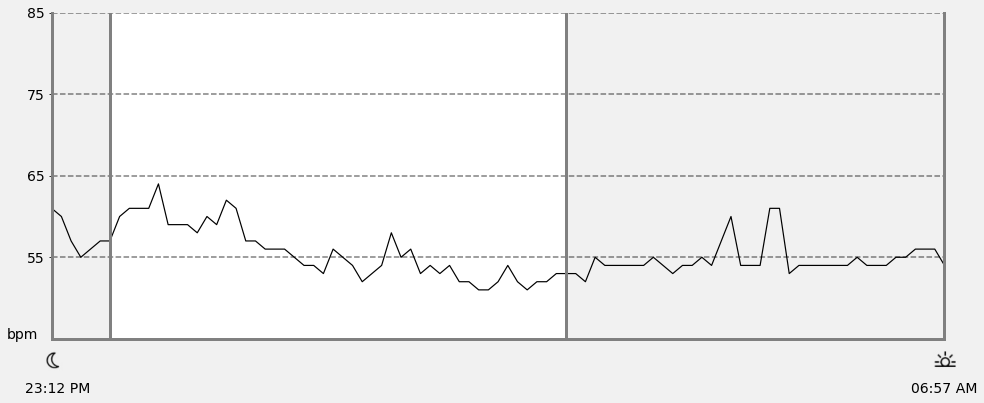

In [ ]:
# Creating a matplotlib plot of size 16,8
plt1 = plt.figure(figsize=(16,6),facecolor='#F1F1F1')
ax = plt1.gca()
ax.set_facecolor('#F1F1F1')

# Setting yticks and y limits
plt.ylim(45,85)
plt.yticks([55,65,75,85],fontsize=14)

plt.plot(list(hr.keys()),list(hr.values()), color='black',lw=1.2)
plt.axvline(x = list(hr.keys())[6], color = '#808080',lw=3)
plt.axvline(x = list(hr.keys())[53], color = '#808080', lw=3)

for i in range(6, 53):
    plt.axvspan(i, i+1, facecolor='white', alpha=1)

# Adding horizontal grids
plt.grid(axis="y",lw=1.5,color='black', linestyle='--',alpha=0.5)

# Removing xlabels
plt.xticks([],[])

# Removing margins on left and right of the plot
plt.margins(x=0)

# Adding moon image to plot
moon_im = plt.imread('https://i.imgur.com/ovTvFmX.png') # insert path of the image.
moon = plt1.add_axes([0.0875,0.05,0.05,0.05], anchor='NE', zorder=1)
moon.imshow(moon_im)
moon.axis('off')

# Adding sun image to plot
im = plt.imread('https://i.imgur.com/ePdtft8.png') # insert path of the image.
newax = plt1.add_axes([0.865,0.05,0.05,0.05], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

# Adding start time text
plt.text(0.13,0,start_time,fontsize=14,transform=plt1.transFigure,
         horizontalalignment='center', weight=300)

# Adding end time text
plt.text(0.9,0,end_time,fontsize=14,transform=plt1.transFigure,
         horizontalalignment='center', weight=300)

# Adding the word bpm
plt.text(0.1,0.125,'bpm',fontsize=14,transform=plt1.transFigure,
         horizontalalignment='center', weight=300)

# Removing the spines on top
ax.spines['top'].set_visible(False)

# Adding color to right, bottom and left spines
ax.spines['right'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')
ax.spines['left'].set_color('#808080')

# Increasing spine width
[i.set_linewidth(3) for i in ax.spines.values()]


# Showing the plot
plt.show()

*^ The plot we created ourselves*

## 4.2 Visualizing Participants Sleep Breakdown

Polar Vantage V2 has an inbuilt sleep/recovery tracker which allows the participant to track their Sleep into different stages. On the polar flow app, a user can go into their nightly recharge breakdown to check their Hypnograms. The plar flow app should show you the following chart:

<img src='https://i.imgur.com/HNXVQar.jpg' width='750px'>

Before getting started with data wrangling, in the box below input the date for which you want to draw the specific plot.

In [ ]:
#@title Set date for the chart below

plot_date = "2022-08-12" #@param {type:"date"}

if plot_date not in sleep_date_list:
  print('Date is not in your data, chose another date!')

Next, we will create a bar plot to see how the data provided by the polar flow api compares to our expected chart.

<BarContainer object of 63 artists>

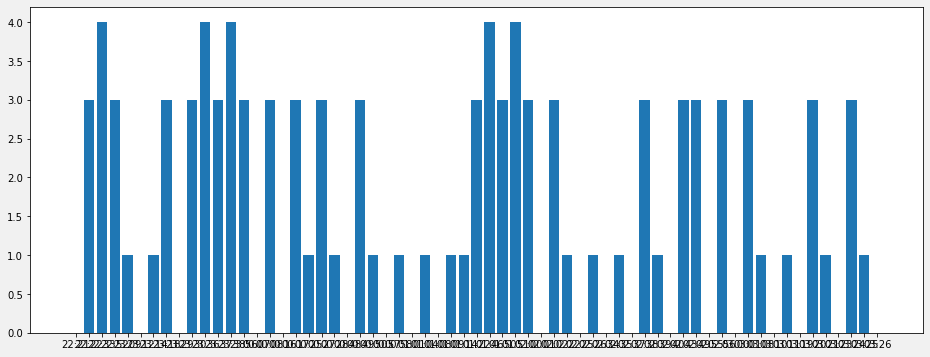

In [ ]:
plt2 = plt.figure(figsize=(16,6),facecolor='#F1F1F1')
plt.bar(list(sleep.loc[plot_date]['nights']['hypnogram'].keys()),list(sleep.loc[plot_date]['nights']['hypnogram'].values()))

The cart above seems to be on a scale of 0 to 4 which means that we would have to clean up the hypnogram data to make it usable for our plot. Also, the timestamps are variably distributed (some are at a difference of 1 min and the rest are even 10 minutes).

Below, we will create 3 dictionaries, one for our cleaned data (in the range -3 to 1) and one for the color for each entry.

In [ ]:
hypnodata = sleep.loc[plot_date]['nights']
sleep_hypnogram = sleep.loc[plot_date]['nights']['hypnogram']
sleep_hypnogram_altered = {}
sleep_hypnogram_altered_color = {}
master_color_key = {'1':'#F8772E','2':'#F8772E','-1':'#45DD9D','-2':'#1559F8','-3':'#5A25A1'}

Now, let's clean up the data so we have the entries that we require for the plot above.

In [ ]:
# Creates a list of all the timestamps
key_list = list(sleep_hypnogram.keys())

# Iterating through each key in timestamps except last
for i in range(len(key_list)-1):

  # Getting the current timestamp
  key = key_list[i]

  # Getting the next timestamp
  next_key = key_list[i+1]

  # Calculating the total number of mintues between the concurrent timestamps
  minutes = int(next_key.split(':')[1]) - int(key.split(':')[1])

  # Cleaning minutes if the hour value changes
  if minutes < 0:
    minutes = 60 + minutes
  
  # Getting the current marking for the hypnogram
  value = sleep_hypnogram[key]

  # t_val is the hypnogram value changed to suit our plot
  t_val = None

  # Value for Light Sleep
  if value == 3:
    sleep_hypnogram_altered[key] = -2
    t_val = -2
  
  # Value for Deep Sleep
  elif value == 4:
    sleep_hypnogram_altered[key] = -3
    t_val = -3
  
  # Value for REM
  elif value == 1:
    sleep_hypnogram_altered[key] = -1
    t_val = -1
  
  # Value for Interruptions
  else:
    if minutes > 1:
      # Longer interruptions
      sleep_hypnogram_altered[key] = 2
      t_val = 2
    else:
      sleep_hypnogram_altered[key] = 1
      t_val = 1
  
  # Key to be changed in order to get all the 
  # keys between the concurrent timestamps
  test_key = key

  # Setting color for the main timestamp
  sleep_hypnogram_altered_color[key] = master_color_key[str(t_val)]

  # Finding all the timestamps between key and next_key
  for i in range(minutes):
    # Cleaning timestamp values if hour changes
    if int(test_key.split(':')[1]) == 59:
      if int(test_key.split(':')[0]) + 1 == 24:
        test_key = '00:00'
      else:
        test_key = str(int(test_key.split(':')[0]) + 1).zfill(2)+':'+'00'
    else:
      test_key = (test_key.split(':')[0].zfill(2)+':'+
                  str(int(test_key.split(':')[1])+1).zfill(2))
    
    # Setting the color and t_val for the test_key
    sleep_hypnogram_altered[test_key] = t_val
    sleep_hypnogram_altered_color[test_key] = master_color_key[str(t_val)]


Now that we have all our required data, let's plot!

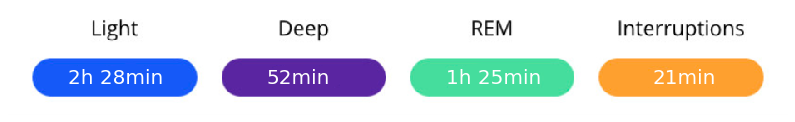

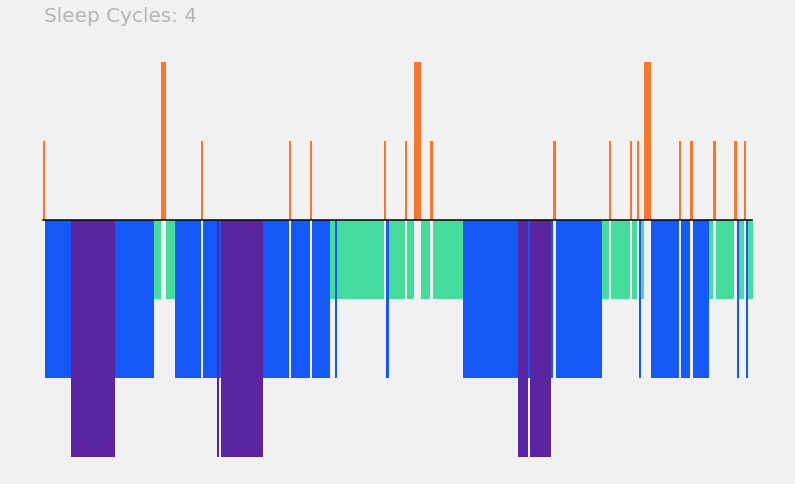

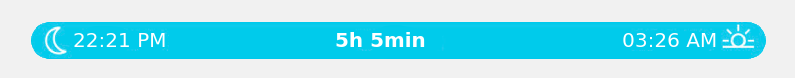

In [ ]:
# Creating the header figure
# Creating the header
header = plt.figure(figsize=(14,8), facecolor='white')
header_ax = header.gca()
header_ax.set_facecolor('white')

# Removing x and y ticks for the header
plt.xticks([],[])
plt.yticks([],[])

# Plotting header background image
header_img = plt.imread('https://i.imgur.com/2I4TxYH.png')
plt.imshow(header_img,  interpolation='nearest')

# Removing the spines on top, left and right
header_ax.spines['top'].set_visible(False)
header_ax.spines['right'].set_visible(False)
header_ax.spines['left'].set_visible(False)
header_ax.spines['bottom'].set_visible(False)

# Function to convert seconds into the time format used in Polar Flow headers
def secondsconverter(secs):
  if secs//3600 == 0:
    return str(int(np.ceil(secs/60)))+'min'
  else:
    return (str(int(np.floor(secs/3600)))+'h '+
            str(int(np.ceil((secs%3600)/60)))+'min')

# Displaying header information
plt.text(0.765,0.4625,secondsconverter(hypnodata['total_interruption_duration']),
        transform=header.transFigure,fontsize=20,color='white')
plt.text(0.56,0.4625,secondsconverter(hypnodata['rem_sleep']),
        transform=header.transFigure,fontsize=20,color='white')
plt.text(0.3825,0.4625,secondsconverter(hypnodata['deep_sleep']),
        transform=header.transFigure,fontsize=20,color='white')
plt.text(0.185,0.4625,secondsconverter(hypnodata['light_sleep']),
        transform=header.transFigure,fontsize=20,color='white')

# Creating the plot figure
plt2 = plt.figure(figsize=(14,8), facecolor='#F1F1F1')
ax = plt2.gca()
ax.set_facecolor('#F1F1F1')

# Removing xticks and yticks
plt.xticks([],[])
plt.yticks([],[])

# Removing the spines on top, left and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Creating the sleep cycle text
plt.text(0,2.5,'Sleep Cycles: '+str(
    sleep.loc[plot_date]['nights']['sleep_cycles']), fontsize=20,
     color='#B5B5B5')
#Setting x-axis to black
plt.axhline(y = 0, color = 'black', linestyle = '-',xmin = 0.046, xmax = 0.953)

# Plotting the bar chart
plt.bar(list(sleep_hypnogram_altered.keys()),
        list(sleep_hypnogram_altered.values()),width=1,
        color=sleep_hypnogram_altered_color.values())

# Adding bottom bar to plot in a seprate chart
# insert path of the image.
b_bar_img = plt.imread('https://i.imgur.com/RMsObxL.png')
b_bar = plt.figure(figsize = (14,2), facecolor='#F1F1F1')
ax2 = b_bar.gca()
ax2.set_facecolor('#F1F1F1')

# Plotting the image
plt.imshow(b_bar_img,  interpolation='nearest')

# Removing xticks and yticks
plt.xticks([],[])
plt.yticks([],[])

# Adding text for start and end time
start_time =  hypnodata['sleep_start_time'].split('T')[1][:5]
plt.text(0.19,0.45,time_setter(start_time),transform=b_bar.transFigure,
         color='white',fontsize=20)
end_time =  hypnodata['sleep_end_time'].split('T')[1][:5]
plt.text(0.735,0.45,time_setter(end_time),transform=b_bar.transFigure,
         color='white',fontsize=20)

# Adding text for total time
total_sleep_secs = (hypnodata['light_sleep']+hypnodata['deep_sleep']+
                    hypnodata['rem_sleep']+
                    hypnodata['total_interruption_duration'])
total_time_str = (str(int(np.floor(total_sleep_secs/3600)))+'h '+
                  str(int(np.ceil((total_sleep_secs%3600)/60)))+'min')
plt.text(0.45,0.45,total_time_str,transform=b_bar.transFigure,
         color='white',fontsize=20,fontweight=800)

# Removing the spines on top, left and right
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.show()

*^ Above is the plot that we created ourselves!*

## 4.3 Visualizing Weekly Sleep Summary

Along with the detailed sleep breakdown, our Polar Vantage also provides information on weekly sleep breakdown. For our next plot, let's recreate the following plot from the Polar Flow app.

<img src='https://i.imgur.com/jog0iGJ.jpg' width='600px'>

First, let's create a start date for the weekly plot. The end date would be exactly 7 days from then.

In [ ]:
#@title Set date for the chart below

plot_date = "2022-08-15" #@param {type:"date"}

if plot_date not in sleep_date_list:
  print('Date is not in your data, chose another date!')

In [ ]:
start_date = datetime.strptime(plot_date, '%Y-%m-%d')
end_date = start_date + timedelta(6)
end_date_str = str(end_date.year)+'-'+str(end_date.month)+'-'+str(end_date.day)
print('Our end date is: '+end_date_str)

Our end date is: 2022-8-21


Now that we have the end date, let's create a list of all the dates between our end and start date. We will be using them as the xticks for our plot.

In [ ]:
weekly_dates_list = []
xticks = []
for i in pd.date_range(start_date,end_date,freq='d'):
  weekly_dates_list.append(str(i)[:10])
  test_date = datetime.strptime(str(i)[:10], '%Y-%m-%d')
  xticks.append(str(test_date.day)+'        \n'+
                test_date.strftime("%A")[0]+'         ')
weekly_dates_list

['2022-08-15',
 '2022-08-16',
 '2022-08-17',
 '2022-08-18',
 '2022-08-19',
 '2022-08-20',
 '2022-08-21']

In the next step, we will create a dictionary to store the daily value for all the days in the given week as it would be easier for us to compute values if all the data is stored in the same place. We will also store the average of all the nightly goals recommended by the Polar Vantage watch.

In [ ]:
value_dict = {}
goals = []
for date in weekly_dates_list:
  if date in list(sleep.index):
    hypnodata = sleep.loc[date]['nights']
    value_dict[date] = (hypnodata['light_sleep']+hypnodata['deep_sleep']+
                    hypnodata['rem_sleep']+
                    hypnodata['total_interruption_duration']) / 3600
    goals.append(hypnodata['sleep_goal']/3600)
  else:
    value_dict[date] = None
value_dict

{'2022-08-15': 5.775,
 '2022-08-16': 7.275,
 '2022-08-17': 6.966666666666667,
 '2022-08-18': 7.683333333333334,
 '2022-08-19': 9.725,
 '2022-08-20': 7.45,
 '2022-08-21': 7.983333333333333}

Now that we have all the required data in the correct format, let's actually plot our chart!

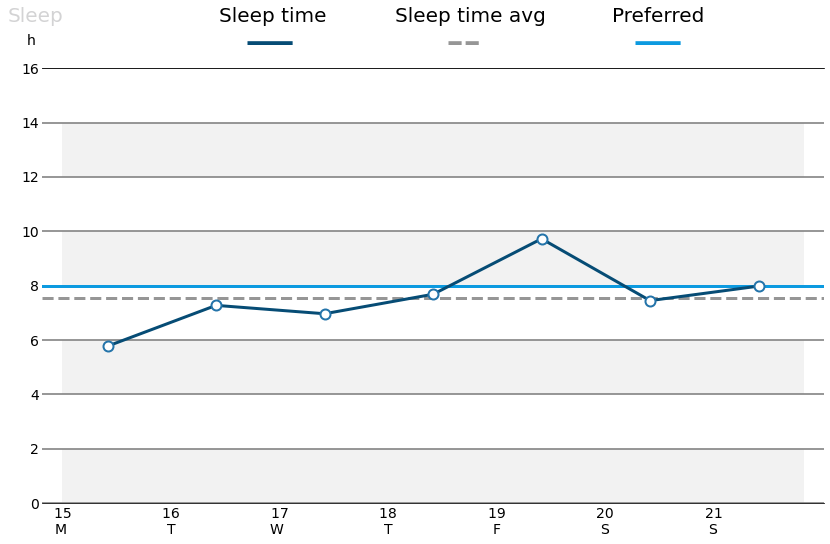

In [ ]:
# Creating the figure
plt3 = plt.figure(figsize=(14,8))
ax = plt3.gca()

# Adding grid to the plot
plt.grid(axis = 'y',color="#7F7F7F", linestyle='-', linewidth=2,alpha=0.8)

# Adding the color lines to grid
for (x,y) in [(0,2),(4,6),(8,10),(12,14)]:
  for i in np.arange(x, y):
    plt.axhspan(i, i+1, facecolor='#F2F2F2', alpha=1,
                xmin = 0.025, xmax = 0.975)


# Plotting line for preferred sleep
plt.axhline(np.mean(goals),color='#0C9AE0',lw=3)

# Plotting line for average sleep
plt.axhline(np.mean(list(value_dict.values())), linestyle='--',
            color='#969696',lw=3)

# Plotting the values
plt.plot(list(value_dict.keys()),list(value_dict.values()), 
         color='#064C75',lw=3)

# Removing margins on left and right of the plot
plt.margins(y=0,x=0.1)



# Highlighting single data points
for x,y in value_dict.items():
  plt.plot(x, y, marker="o", markersize=10,
    markeredgecolor="#2474AA",markerfacecolor="white", markeredgewidth=2)


# Removing the spines on left and right
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Modifying our x and y ticks
plt.yticks([0,2,4,6,8,10,12,14,16],fontsize=14)
plt.xticks(list(value_dict.keys()),xticks,ha='right',fontsize=14)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Adding header text
plt.text(0.09,0.96,'Sleep', transform=plt3.transFigure,
         color='#D3D3D4',fontsize=20)
plt.text(0.109,0.92,'h', transform=plt3.transFigure,
         color='black',fontsize=14)

plt.text(0.3,0.96,'Sleep time', transform=plt3.transFigure,
         color='black',fontsize=20)
plt.text(0.325,0.9,'—', transform=plt3.transFigure,
         color='#064C75',fontsize=50)

plt.text(0.475,0.96,'Sleep time avg', transform=plt3.transFigure,
         color='black',fontsize=20)
plt.text(0.525,0.9,'--', transform=plt3.transFigure,
         color='#969696',fontsize=50)

plt.text(0.69,0.96,'Preferred', transform=plt3.transFigure,
         color='black',fontsize=20)
plt.text(0.71,0.9,'—', transform=plt3.transFigure,
         color='#0C9AE0',fontsize=50)

plt.show()

*^ Above is the plot that we created ourselves!*

# 5. Data Analysis

## 5.1 Correlation between Sleep Phase and Heart Rate

Accoring to a [research](https://www.health.harvard.edu/blog/how-does-sleep-affect-your-heart-rate-2021012921846#:~:text=People%20typically%20spend%20about%20half,below%20your%20resting%20heart%20rate.) by Harvard Medical School, "Within about five minutes after you drift off to sleep, your heart rate gradually slows to its resting rate as you enter what’s known as light sleep." and "during the next phase, deep sleep, your blood pressure falls and your heart rate slows to about 20% to 30% below your resting heart rate."<br> <br>

In this section, we will be testing if the average heart rate during light sleep is higher than the average heart rate during deep sleep. <br>

**Our Hypothesis:**  The participants mean heart rate during light sleep is always higher than their average during deep sleep.


To test our hypothesis, we will traverse through all the nights in our sleep dataset and find the average for that night during light and deep sleep phases. We will store these averages in different lists to visualize the results. We would also be calculating the proportion of times light sleep averages were higher than deep sleep averages to get a quickly understand the result of our hypothesis test.

In [ ]:
experiment_count = 0
lightmorethandeep = 0
light_sleep_avg = []
deep_sleep_avg = []

for i in range(len(sleep)):
  hr_sample = sleep.iloc[i]['nights']['heart_rate_samples']
  hypnogram = sleep.iloc[i]['nights']['hypnogram']  
  light_sleep_hr = []
  deep_sleep_hr = []
  for key,val in hypnogram.items():
    if val == 3:
      if key in hr_sample:
        light_sleep_hr.append(hr_sample[key])
      else:
        rounded_mins = str(round(int(key.split(':')[1])/5.0)*5).zfill(2)
        if rounded_mins == '60':
          key_rounded = key[:3]+'55'
        else:
          key_rounded = key[:3]+rounded_mins
        if key_rounded in hr_sample:
          light_sleep_hr.append(hr_sample[key_rounded])
    if val == 4:
      if key in hr_sample:
        deep_sleep_hr.append(hr_sample[key])
      else:
        rounded_mins = str(round(int(key.split(':')[1])/5.0)*5).zfill(2)
        if rounded_mins == '60':
          key_rounded = key[:3]+'55'
        else:
          key_rounded = key[:3]+rounded_mins
        if key_rounded in hr_sample:
          deep_sleep_hr.append(hr_sample[key_rounded])
  if len(light_sleep_hr)==0 or len(deep_sleep_hr)==0:
    continue
  experiment_count+=1
  light_sleep_avg.append(np.mean(light_sleep_hr))
  deep_sleep_avg.append(np.mean(deep_sleep_hr))
  if np.mean(light_sleep_hr) > np.mean(deep_sleep_hr):
    lightmorethandeep+=1

Now that we have traversed through all the nights, let's check the proportion of nights which favoured our hypothesis with light sleep heart rate averages higher than deep sleep averages.

In [ ]:
result = int((lightmorethandeep/experiment_count)*100)
result

72

Based on the result above, our hypothesis was only true for 72% of the experiments which means that 28% of the nights, the average heart rate during deep sleep was higher than light sleep. This seems to contradict our hypothesis. In the next step, let's visualize these values and statistically prove this statement.

We would draw a catplot to visually understand the breakdown of the average heart rate values for light and deep sleep phases. 

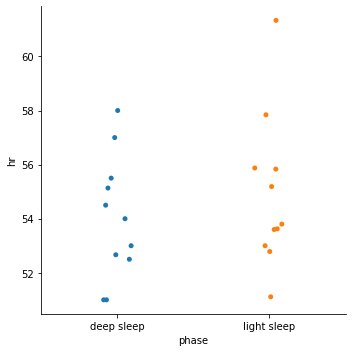

In [ ]:
hr_list = deep_sleep_avg  + light_sleep_avg
key_list = ['deep sleep' for  i in range(len(deep_sleep_avg))] + ['light sleep' for  i in range(len(light_sleep_avg))]

# Creating the DataFrame
hr_breakdown_df = pd.DataFrame()
hr_breakdown_df = hr_breakdown_df.assign(hr = hr_list)
hr_breakdown_df = hr_breakdown_df.assign(phase = key_list)
hr_breakdown_df.head()

sns.catplot(x="phase", y="hr", data=hr_breakdown_df)

Based on the chart above we can see that the average heart rate breakdown follows a roughly similar pattern for deep and light sleep phases.

However, let's perform a two-sample t-Test in order to prove this statistically. A [t-test](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4744321/) is a type of statistical test used to determine if there is a significant difference between the means of two groups.

In [ ]:
stats.ttest_ind(light_sleep_avg,deep_sleep_avg)

Ttest_indResult(statistic=0.8084603389052034, pvalue=0.4283381670834896)

The p-value for this test is 42% which shows that there is not enough statisitcal evidence to reject or accept our hypothesis that the average heart rate values for light sleep phases were always larger than the average heart rate values for deep sleep phases.

## 5.2 Correlation between Heart Rate variability and Breathing Rate

According to a [course](https://www.uh.edu/class/ctr-public-history/tobearfruit/__docs/curriculum/ms/science/conxnbetwrespandhrtrate/lessonplan_conxnbetwrespandhrtrate.pdf) taught at the University of Huston, "The more the heart beats, the more breathing occurs. As the heart beats faster, it uses more energy and sends more oxygen to the body. If a person is exercising the oxygen is used very quickly in order to provide the muscles with needed energy to move. Thus the heart beats faster to pump more oxygen to the muscles."

**Our test hypothesis will be that Heart Rate and Breathing Rate are correlated.**

In this portion of the notebook, we will be testing this exact hypothesis using the data that we fetched from the Polar Accesslink API.

Before starting, let's chose a date for which we want to find this correlation.

In [ ]:
#@title Set date for the chart below

plot_date = "2022-08-17" #@param {type:"date"}

if plot_date not in sleep_date_list:
  print('Date is not in your data, chose another date!')

Next, let's get the Heart Rate and Breathing Rate during the sleep on that specific date.

In [ ]:
HR = sleep.loc[plot_date]['nights']['heart_rate_samples']
BR = recharge.loc[plot_date]['recharges']['breathing_samples']

In [ ]:
print(list(HR.keys())[0],list(BR.keys())[0], len(HR),len(BR))

01:05 01:04 84 84


For this study we will assume that both the Heart and Breathing Rate measurements were taken within a very short interval of each other, thereby ignoring the 60 second time interval between the timestamps. Let's first create a dataframe to store these values for proper analysis.

In [ ]:
hrbr = pd.DataFrame()
hrbr = hrbr.assign(timestamp = HR.keys())
hrbr = hrbr.assign(HR = HR.values())
hrbr = hrbr.assign(BR = list(BR.values()))
hrbr = hrbr.set_index('timestamp')
hrbr.head()

,HR,BR
timestamp,,
01:05,57,12.3
01:10,56,13.6
01:15,54,13.5
01:20,54,13.7
01:25,55,13.8


Let's create a quick plot on this to see if there is a correlation between these two values.

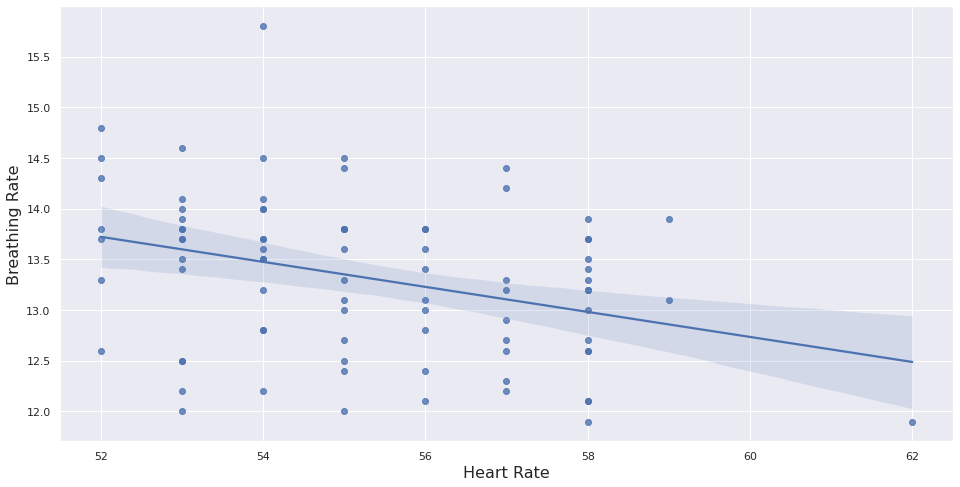

In [ ]:
# Setting Figure Size in Seaborn
sns.set(rc={'figure.figsize':(16,8)})

# Setting Seaborn plot style
sns.set_style("darkgrid")

#Plotting our data
plot = sns.regplot(data=hrbr, x='HR', y="BR")

#Renaming x and y labels
plot.set_ylabel("Breathing Rate", fontsize = 16)
plot.set_xlabel("Heart Rate", fontsize = 16)

print()

Looking at the graph, we can see a line of regression which hints that Breathing and Heart Rate are inversely correlated. In the next line, we will prove this statistically.

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    hrbr.get('HR'), hrbr.get('BR'))

print(f'Slope: {slope:.3g}')
print(f'Coefficient of determination: {r_value**2:.3g}')
print(f'p-value: {p_value:.3g}')

Slope: -0.123
Coefficient of determination: 0.117
p-value: 0.00142


The p-value for this is 0.142% which is much smaller than the 5% cutoff. This means that there is enough evidence to convincingly conclude that that there is a correlation between Heart and Breating Rate.